## OBJECTIVE 2


Develop a regression model to predict box office profits based on the following key features:

        1. Production Budget: The financial investment required to produce the film.

        2. Genre: The category or type of movie (e.g., action, drama, comedy).

        3. Runtime: The duration of the movie in minutes.

        4. Release Date: The timing of the film's release, which may impact audience turnout.

        5. Domestic Gross Revenue: The total revenue generated within the domestic market.

        6. Worldwide Gross Revenue: The total revenue generated globally.

        7. Foreign Gross Revenue: The revenue generated outside the domestic market.

        8. Ratings: Audience and critic reviews, reflecting the perceived quality of the movie.

        9. Number of Votes: The total number of ratings received, indicating audience engagement.

This model aims to forecast profitability for upcoming projects, enabling the studio to make data-driven decisions regarding production, marketing, and release strategies.

# Uploading the datasets

In [471]:
#Import libraries

import pandas as pd
import sqlite3
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#import libraries

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
%matplotlib inline

### 1.  tn.movie_budgets.csv.gz

In [432]:
#1. Load tn.movie_budgets.csv.gz
tn_movie_budgets_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\tn.movie_budgets.csv.gz"
tn_movie_budgets = pd.read_csv(tn_movie_budgets_path)
tn_movie_budgets.head()
#tn_movie_budgets.shape

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

### 2. bom.movie_gross.csv.gz

In [433]:
#2. Load bom.movie_gross.csv.gz

bom_movie_gross_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz"
bom_movie_gross = pd.read_csv(bom_movie_gross_path)
bom_movie_gross.head()


title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [434]:
#bom_movie_gross = bom_movie_gross[["title", "domestic_gross", "foreign_gross", "year"]]
#bom_movie_gross.head()
bom_movie_gross

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

merged_data = pd.merge(merged_data, rt_movie_info, on="id", how="outer")
merged_data.head()

### 3. tmdb.movies.csv.gz

In [435]:
#5. load tmdb.movies.csv.gz

tmdb_movies = pd.read_csv("C:\\Users\\Fluxtech\\Desktop\\dsc-phase-2-project-v3\\zippedData\\tmdb.movies.csv.gz")

tmdb_movies.head()


Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [436]:
tmdb_movies = tmdb_movies[["id", "title", "genre_ids", "vote_average"]]
print(tmdb_movies["id"])

0         12444
1         10191
2         10138
3           862
4         27205
          ...  
26512    488143
26513    485975
26514    381231
26515    366854
26516    309885
Name: id, Length: 26517, dtype: int64


In [437]:
#merged_data = pd.merge(merged_data, tmdb_movies, on="id", how="outer")
#merged_data.head()

tn_movie_budgets.rename(columns={"movie": "title"}, inplace=True)

merged_data = pd.merge(tmdb_movies, tn_movie_budgets, on="title", how="outer")
merged_data.head()


id_x                                title genre_ids  vote_average  \
0  564096.0                            "BLESSED"  [99, 12]           7.0   
1  283543.0  "Legitimate Rape" Pharmaceutical Ad  [35, 80]           2.3   
2  263765.0                   "cherry" - Supreme      [99]          10.0   
3   41371.0                  #1 Cheerleader Camp  [35, 18]           3.6   
4  368247.0                         #ALLMYMOVIES      [99]           9.0   

   id_y release_date production_budget domestic_gross worldwide_gross  
0   NaN          NaN               NaN            NaN             NaN  
1   NaN          NaN               NaN            NaN             NaN  
2   NaN          NaN               NaN            NaN             NaN  
3   NaN          NaN               NaN            NaN             NaN  
4   NaN          NaN               NaN            NaN             NaN

### 4. load database

In [438]:
#6. load database

import zipfile

# Path to the zipped SQLite database
im_db_zip_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\im.db.zip"
im_db_extracted_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\im.db"

# Unzip the SQLite database
with zipfile.ZipFile(im_db_zip_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData")

# Connect to the SQLite database
conn = sqlite3.connect(im_db_extracted_path)


In [439]:
# List tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

# Replace 'table_name' with each table's name from the list
schema_query = "PRAGMA table_info(table_name);"
schema = pd.read_sql(schema_query, conn)
print(schema)



            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []


In [440]:
pd.read_sql("""SELECT * FROM 
 movie_basics
 WHERE primary_title = "Dark Phoenix"

""", conn)

movie_id primary_title original_title  start_year  runtime_minutes  \
0  tt6565702  Dark Phoenix   Dark Phoenix        2019            113.0   

                    genres  
0  Action,Adventure,Sci-Fi

In [441]:
pd.read_sql("""SELECT * FROM 
 directors
 WHERE movie_id = 'tt0285252'
 

""", conn)

movie_id  person_id
0  tt0285252  nm0899854

In [442]:
pd.read_sql("""SELECT * FROM 
 known_for
 WHERE movie_id = 'tt0285252' 


""", conn)

person_id   movie_id
0  nm0899854  tt0285252
1  nm0960950  tt0285252
2  nm1288474  tt0285252
3  nm2325677  tt0285252
4  nm1077681  tt0285252

In [443]:
#for loop to access the content of each table
#LIMIT 5


import pandas as pd

# List all tables in the SQLite database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

# Loop through each table and fetch content
for table in tables['name']:
    print(f"Table: {table}")
    try:
        # Fetch the first 5 rows from the table
        content_query = f"SELECT * FROM {table} LIMIT 5;"
        table_content = pd.read_sql(content_query, conn)
        
        # Display the content
        print(table_content)
    except Exception as e:
        print(f"Error accessing table {table}: {e}")
    print("\n" + "="*50 + "\n")


Table: movie_basics
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


Table: directors
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502


Table: known_for
   pe

## Extrating movie_basics table

In [444]:
# Extract the movie_basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Save the table to a CSV file
output_csv_path = "movie_basics.csv"  # Specify the desired output path
movie_basics.to_csv(output_csv_path, index=False)

# Close the database connection
conn.close()

print(f"The movie_basics table has been successfully saved as {output_csv_path}.")

The movie_basics table has been successfully saved as movie_basics.csv.


In [445]:
movie_basics = pd.read_csv("movie_basics.csv")
movie_basics.head()


movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [446]:
movie_basics.rename(columns={"primary_title": "movie"}, inplace=True)
movie_basics.head()

movie_id                            movie              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [447]:
#1. Load tn.movie_budgets.csv.gz
tn_movie_budgets_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\tn.movie_budgets.csv.gz"
tn_movie_budgets = pd.read_csv(tn_movie_budgets_path)
tn_movie_budgets.head()
#tn_movie_budgets.shape

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

### Merging tn_movie_budgets with movie_basics

In [449]:
# Merge the two datasets on the `movie` column
merged_data = pd.merge(
    movie_basics,
    tn_movie_budgets,
    on="movie",  # Merging on the 'movie' column
    how="inner"  # Use 'inner' to include only rows that match in both datasets
)
# Save the merged dataset to a CSV file
output_csv_path = "merged_movie_basics_and_budgets.csv"  # Desired output file name
merged_data.to_csv(output_csv_path, index=False)

print(f"The merged dataset has been successfully saved as {output_csv_path}.")

# Define the output path with the specific location and filename
#output_csv_path = r"C:\Users\Fluxtech\Desktop\Final_dataset\merged_movie_basics_and_budgets.csv"

# Save the merged dataset to the specified location
#merged_data.to_csv(output_csv_path, index=False)

#print(f"The merged dataset has been successfully saved at {output_csv_path}.")


The merged dataset has been successfully saved as merged_movie_basics_and_budgets.csv.


In [450]:
#Upload merged_movie_basics_and budgets
merged_movies = pd.read_csv("C:/Users/Fluxtech/Desktop/Final_dataset/merged_movie_basics_and_budgets.csv")
merged_movies.head()


movie_id                            movie  \
0  tt0249516                       Foodfight!   
1  tt0293429                    Mortal Kombat   
2  tt0326592                    The Overnight   
3  tt0337692                      On the Road   
4  tt0359950  The Secret Life of Walter Mitty   

                    original_title  start_year  runtime_minutes  \
0                       Foodfight!        2012             91.0   
1                    Mortal Kombat        2021              NaN   
2                    The Overnight        2010             88.0   
3                      On the Road        2012            124.0   
4  The Secret Life of Walter Mitty        2013            114.0   

                     genres  id  release_date production_budget  \
0   Action,Animation,Comedy  26  Dec 31, 2012       $45,000,000   
1  Action,Adventure,Fantasy  10  Aug 18, 1995       $20,000,000   
2                       NaN  21  Jun 19, 2015          $200,000   
3   Adventure,Drama,Romance  17  Mar 22, 2013       $25,000,000   
4    Adventure,Comedy,Drama  37  Dec 25, 2013       $91,000,000   

  domestic_gross worldwide_gross  
0             $0         $73,706  
1    $70,433,227    $122,133,227  
2     $1,109,808      $1,165,996  
3       $720,828      $9,313,302  
4    $58,236,838    $187,861,183

### Extracting movie_ratings table

In [ ]:
import pandas as pd
import sqlite3
import zipfile
import os

# Path to the zip file
zip_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\im.db.zip"
extracted_db_path = r"C:\Users\Fluxtech\Desktop\dsc-phase-2-project-v3\zippedData\im.db"  # Path to extract the .db file

# Extract the .db file from the zip archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(extracted_db_path))  # Extract to the same directory

# Connect to the extracted SQLite database
conn = sqlite3.connect(extracted_db_path)

# Extract the movie_ratings table
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Save the table to a CSV file
output_csv_path = r"C:\Users\Fluxtech\Desktop\movie_ratings.csv"  # Adjust the output path as needed
movie_ratings.to_csv(output_csv_path, index=False)

# Close the database connection
conn.close()

print(f"The movie_ratings table has been successfully saved as {output_csv_path}.")


In [451]:
movie_ratings = pd.read_csv("C:/Users/Fluxtech/Desktop/movie_ratings.csv")
movie_ratings.head()

movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21

In [452]:
movie_ratings.shape

(73856, 3)

In [ ]:
#movie_ratings.rename(columns={"movie_id": "movie"}, inplace=True)
#movie_ratings.head()

### Merging merged_movies with movie_ratings

In [ ]:
# Merge the two datasets on the `movie_id` column
merged_final = pd.merge(
    merged_movies,  # First DataFrame
    movie_ratings,  # Second DataFrame
    on="movie_id",  # Column to merge on
    how="inner"  # 'inner' ensures only rows with matching movie_id are included
)

# Display the first few rows of the merged DataFrame
print(merged_final.head())

# Save the merged data to a CSV file (optional)
output_csv_path = "merged_movie_data.csv"  # Specify desired path
merged_final.to_csv(output_csv_path, index=False)

print(f"The merged data has been successfully saved as {output_csv_path}.")


In [453]:
merged_data.shape

(3815, 11)

In [454]:
merged_final = pd.merge(
    merged_data,
    movie_ratings,
    on="movie_id",
    how="inner",
    suffixes=('_merged', '_ratings')  # Custom suffixes
)


In [ ]:
merged_final.head()

In [ ]:
merged_final.shape

In [ ]:
# Define the output path with the specific location and filename
output_csv_path = r"C:\Users\Fluxtech\Desktop\Final_dataset\df1.csv"

# Save the df1 DataFrame to the specified location
df1.to_csv(output_csv_path, index=False)

print(f"The DataFrame 'df1' has been successfully saved at {output_csv_path}.")


# Data information

In [455]:
#checking data shape
df1.head()
#print(df1.shape)

movie_id                            movie  \
0  tt0249516                       Foodfight!   
1  tt0326592                    The Overnight   
2  tt0337692                      On the Road   
3  tt0359950  The Secret Life of Walter Mitty   
4  tt0365907      A Walk Among the Tombstones   

                    original_title  start_year  runtime_minutes  \
0                       Foodfight!        2012             91.0   
1                    The Overnight        2010             88.0   
2                      On the Road        2012            124.0   
3  The Secret Life of Walter Mitty        2013            114.0   
4      A Walk Among the Tombstones        2014            114.0   

                    genres  id  release_date  production_budget  \
0  Action,Animation,Comedy  26  Dec 31, 2012           45000000   
1                      NaN  21  Jun 19, 2015             200000   
2  Adventure,Drama,Romance  17  Mar 22, 2013           25000000   
3   Adventure,Comedy,Drama  37  Dec 25, 2013           91000000   
4       Action,Crime,Drama  67  Sep 19, 2014           28000000   

   domestic_gross worldwide_gross  averagerating  numvotes  
0               0         $73,706            1.9      8248  
1         1109808      $1,165,996            7.5        24  
2          720828      $9,313,302            6.1     37886  
3        58236838    $187,861,183            7.3    275300  
4        26017685     $62,108,587            6.5    105116

In [456]:
#check database info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   movie              2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   id                 2875 non-null   int64  
 7   release_date       2875 non-null   object 
 8   production_budget  2875 non-null   int32  
 9   domestic_gross     2875 non-null   int32  
 10  worldwide_gross    2875 non-null   object 
 11  averagerating      2875 non-null   float64
 12  numvotes           2875 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(6)
memory usage: 269.7+ KB


#Function to clean and convert to numeric
def clean_and_convert_to_float(column):
    return column.str.replace(r"[^\d]", "", regex=True).astype(float)

#Convert relevant columns to float64
df1['production_budget'] = clean_and_convert_to_float(df1['production_budget'])
df1['domestic_gross'] = clean_and_convert_to_float(df1['domestic_gross'])
df1['worldwide_gross'] = clean_and_convert_to_float(df1['worldwide_gross'])

#Verify the data types
print(df1.dtypes)


In [457]:
#checking summary statistics
df1.describe()

start_year  runtime_minutes          id  production_budget  \
count  2875.000000      2757.000000  2875.00000       2.875000e+03   
mean   2013.916522       102.945956    50.94087       3.436427e+07   
std       2.550258        20.788982    28.69815       4.774360e+07   
min    2010.000000         3.000000     1.00000       1.400000e+03   
25%    2012.000000        90.000000    27.00000       5.000000e+06   
50%    2014.000000       101.000000    51.00000       1.700000e+07   
75%    2016.000000       113.000000    76.00000       4.000000e+07   
max    2019.000000       280.000000   100.00000       4.250000e+08   

       domestic_gross  averagerating      numvotes  
count    2.875000e+03    2875.000000  2.875000e+03  
mean     4.302909e+07       6.249217  6.628038e+04  
std      7.452513e+07       1.185992  1.343077e+05  
min      0.000000e+00       1.600000  5.000000e+00  
25%      5.017520e+05       5.600000  1.410000e+02  
50%      1.652141e+07       6.400000  7.951000e+03  
75%      5.186291e+07       7.100000  7.508100e+04  
max      7.605076e+08       9.300000  1.841066e+06

In [ ]:
#describe the categorical features
df1.describe(include = 'O')

In [ ]:
#make a copy
df_movies = df1.copy(deep=True)
df_movies.head()

In [ ]:
#checking unique values all at once 
for column in df_movies:
    unique_values = df_movies[column].unique()
    print(f"unique values in column '{column}', '\n': {unique_values}", '\n')
    

# DATA WRANGLING

In [459]:
#checking columns and chang mispelled
df_movies.columns

Index(['movie_id', 'movie', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'id', 'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'averagerating', 'numvotes'],
      dtype='object')

In [461]:
#change averagerating to average_rating
df_movies.rename(columns = {"averagerating": "average_rating"}, inplace=True)
df_movies.columns


Index(['movie_id', 'movie', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'id', 'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'average_rating', 'numvotes'],
      dtype='object')

In [463]:
#remove white space if any
df_movies.columns = df_movies.columns.str.replace(", ", "")
df_movies.columns


Index(['movie_id', 'movie', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'id', 'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'average_rating', 'numvotes'],
      dtype='object')

In [467]:
#drop unnecessary columns
del df_movies['movie_id']  # Directly delete the column from the DataFrame
del df_movies['id']  # Directly delete the column from the DataFrame


In [468]:
#confirming delete 
df_movies.columns

Index(['movie', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'average_rating', 'numvotes'],
      dtype='object')

### Checking the missing values and dealing with them

In [484]:
#missing values
df_movies.isna().sum()

movie                0
original_title       0
start_year           0
runtime_minutes      0
genres               0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
average_rating       0
numvotes             0
dtype: int64

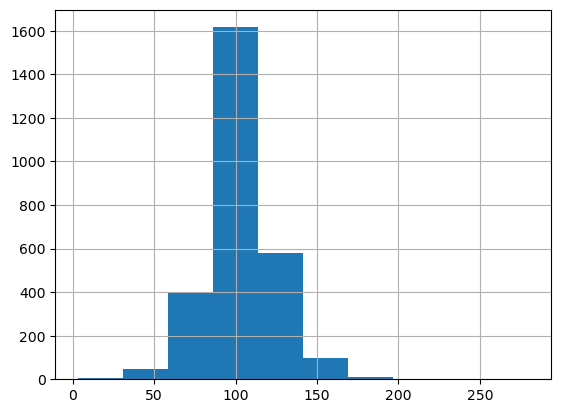

In [477]:
#to deal with missing data, check skweness
df_movies["runtime_minutes"].hist()
plt.show()

#the histogram belows shows the data is normally distributed, so we use mean

In [479]:
#impute 'runtime_minutes' variable using the mean
runtime_minutes_mean = df_movies['runtime_minutes'].mean()
runtime_minutes_mean

102.94595574900254

In [481]:
df_movies['runtime_minutes'] = df_movies["runtime_minutes"].fillna(runtime_minutes_mean)

0        91.000000
1        88.000000
2       124.000000
3       114.000000
4       114.000000
           ...    
2870    115.000000
2871    102.945956
2872    110.000000
2873     85.000000
2874     84.000000
Name: runtime_minutes, Length: 2875, dtype: float64

In [483]:
#droping the missing values since they are just a few
df_movies = df_movies.dropna()

In [485]:
#replace unique values
df_movies.columns

Index(['movie', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'average_rating', 'numvotes'],
      dtype='object')

In [489]:
df_movies['genres'].unique()

array(['Action,Animation,Comedy', 'Adventure,Drama,Romance',
       'Adventure,Comedy,Drama', 'Action,Crime,Drama',
       'Action,Adventure,Sci-Fi', 'Comedy,Drama', 'Comedy,Family',
       'Comedy,Drama,Romance', 'Adventure,Animation,Comedy',
       'Action,Thriller', 'Comedy', 'Action,Adventure,Thriller',
       'Horror,Mystery,Thriller', 'Action,Drama,Family',
       'Drama,Romance,Sci-Fi', 'Biography,Drama,History',
       'Drama,Romance,War', 'Action,Adventure,Comedy',
       'Action,Adventure,Animation', 'Action,Adventure,Fantasy',
       'Biography,Drama,Sport', 'Adventure,Drama,Fantasy',
       'Horror,Thriller', 'Action,Crime,Thriller', 'Crime,Thriller',
       'Comedy,Horror', 'Drama', 'Drama,Mystery,Sci-Fi',
       'Action,Comedy,Crime', 'Comedy,Drama,Music', 'Drama,Fantasy',
       'Action,Adventure,Crime', 'Comedy,Romance',
       'Action,Adventure,Drama', 'Adventure,Drama,History',
       'Drama,History,Romance', 'Adventure,Comedy,Family',
       'Drama,Horror,Mystery', '

In [492]:
#Knowing the total number of uniques in genres

# Split genres by a delimiter (e.g., '|') and explode into separate rows
all_genres = df_movies['genres'].str.split('|').explode()

# Find the total number of unique genres
unique_genres_count = all_genres.nunique()

print(f"Total number of unique genres: {unique_genres_count}")


Total number of unique genres: 311


In [510]:
#converting columns into their relevant datasets
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, 0 to 2874
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2867 non-null   object 
 1   original_title     2867 non-null   object 
 2   runtime_minutes    2867 non-null   float64
 3   genres             2867 non-null   object 
 4   release_date       2867 non-null   object 
 5   production_budget  2867 non-null   int32  
 6   domestic_gross     2867 non-null   int32  
 7   worldwide_gross    2867 non-null   float64
 8   average_rating     2867 non-null   float64
 9   numvotes           2867 non-null   int64  
 10  main_genre         2867 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(5)
memory usage: 246.4+ KB


In [498]:
# Clean and convert the 'worldwide_gross' column to numeric (float64)
df_movies['worldwide_gross'] = (
    df_movies['worldwide_gross']
    .str.replace(r"[^\d]", "", regex=True)  # Remove non-numeric characters
    .fillna("0")  # Replace NaN with "0"
    .astype(float)  # Convert to float64 to handle large values
)

# Verify the results
print(df_movies['worldwide_gross'].head())
print(f"Data type of 'worldwide_gross': {df_movies['worldwide_gross'].dtype}")


0    7.370600e+04
2    9.313302e+06
3    1.878612e+08
4    6.210859e+07
5    1.648855e+09
Name: worldwide_gross, dtype: float64
Data type of 'worldwide_gross': float64


C:\Users\Fluxtech\AppData\Local\Temp\ipykernel_28228\3777564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['worldwide_gross'] = (


In [501]:
#drop unnessary column startdate
del df_movies["start_year"]

### Checking for duplicates

In [ ]:
#check duplicates.

df_movies.duplicated().sum()

### Spliting Genre

When a genre is written as a combination like Adventure,Comedy,Drama, the main genre is typically considered to be the first one listed, which is Adventure in this case.

In [511]:
# Add a new column for the main genre while retaining the original 'genres' column
df_movies['main_genre'] = df_movies['genres'].str.split(',').str[0]

# Display the DataFrame to verify
print(df_movies[['genres', 'main_genre']].head())
df_movies.head()


                    genres main_genre
0  Action,Animation,Comedy     Action
2  Adventure,Drama,Romance  Adventure
3   Adventure,Comedy,Drama  Adventure
4       Action,Crime,Drama     Action
5  Action,Adventure,Sci-Fi     Action


C:\Users\Fluxtech\AppData\Local\Temp\ipykernel_28228\4157533224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['main_genre'] = df_movies['genres'].str.split(',').str[0]


movie                   original_title  \
0                       Foodfight!                       Foodfight!   
2                      On the Road                      On the Road   
3  The Secret Life of Walter Mitty  The Secret Life of Walter Mitty   
4      A Walk Among the Tombstones      A Walk Among the Tombstones   
5                   Jurassic World                   Jurassic World   

   runtime_minutes                   genres  release_date  production_budget  \
0             91.0  Action,Animation,Comedy  Dec 31, 2012           45000000   
2            124.0  Adventure,Drama,Romance  Mar 22, 2013           25000000   
3            114.0   Adventure,Comedy,Drama  Dec 25, 2013           91000000   
4            114.0       Action,Crime,Drama  Sep 19, 2014           28000000   
5            124.0  Action,Adventure,Sci-Fi  Jun 12, 2015          215000000   

   domestic_gross  worldwide_gross  average_rating  numvotes main_genre  
0               0     7.370600e+04             1.9      8248     Action  
2          720828     9.313302e+06             6.1     37886  Adventure  
3        58236838     1.878612e+08             7.3    275300  Adventure  
4        26017685     6.210859e+07             6.5    105116     Action  
5       652270625     1.648855e+09             7.0    539338     Action

### Checking outliers

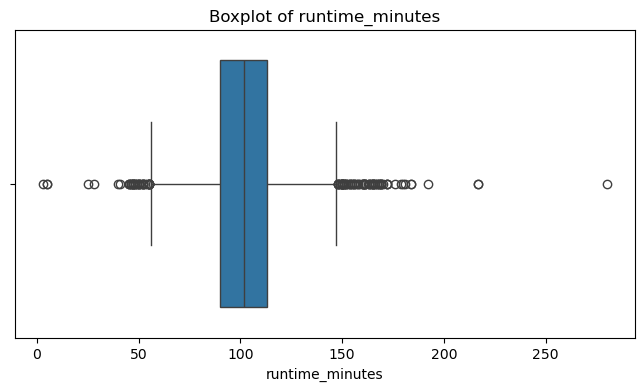

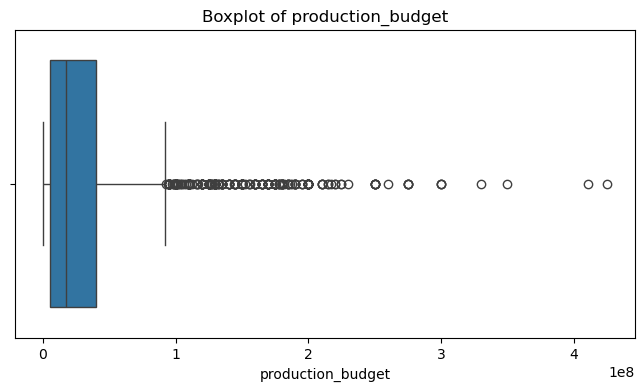

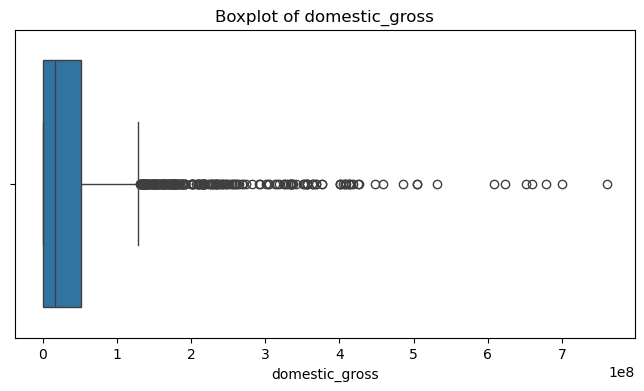

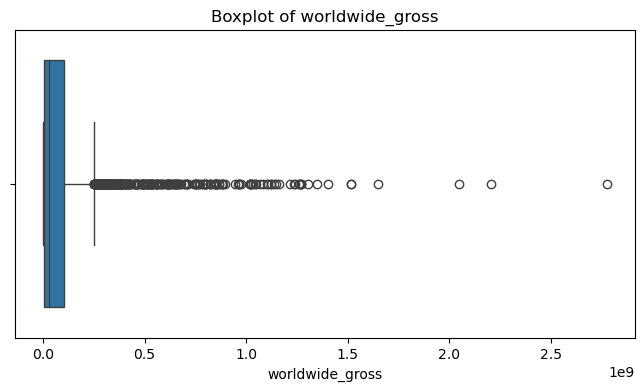

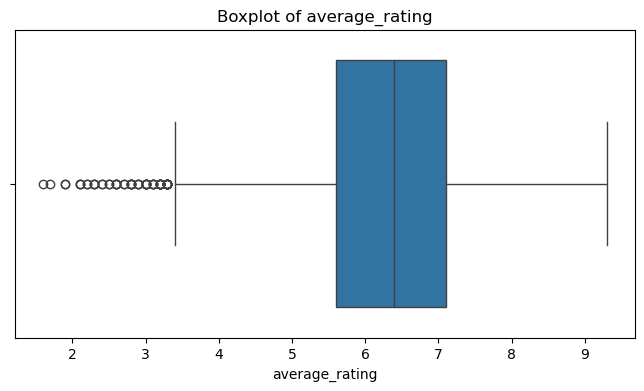

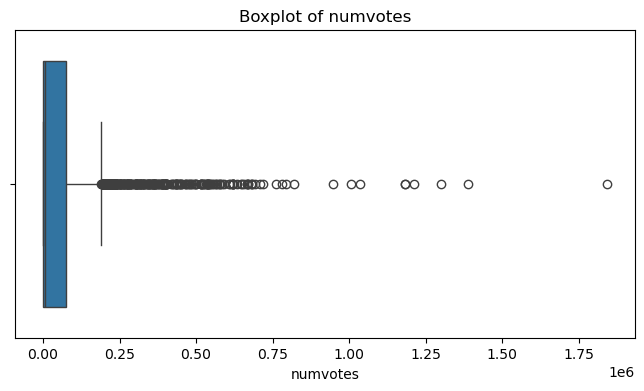

In [508]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df_movies.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Create boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_movies[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [552]:
df3_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2818 entries, 0 to 2874
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2818 non-null   object 
 1   original_title     2818 non-null   object 
 2   runtime_minutes    2818 non-null   float64
 3   genres             2818 non-null   object 
 4   release_date       2818 non-null   object 
 5   production_budget  2818 non-null   int32  
 6   domestic_gross     2818 non-null   int32  
 7   worldwide_gross    2818 non-null   float64
 8   average_rating     2818 non-null   float64
 9   numvotes           2818 non-null   int64  
 10  main_genre         2818 non-null   object 
 11  foreign_gross      2818 non-null   float64
 12  profits            2818 non-null   float64
dtypes: float64(5), int32(2), int64(1), object(5)
memory usage: 286.2+ KB


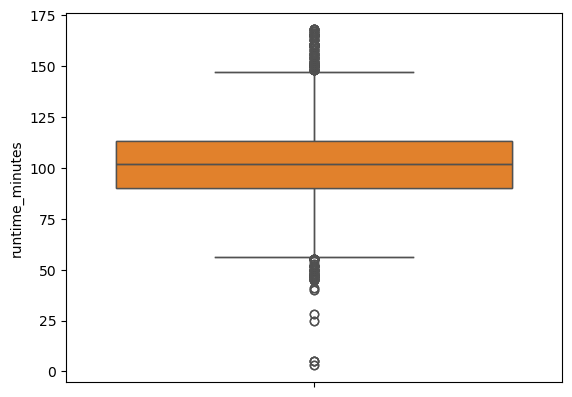

In [519]:
#we use maximum quantile to remove outliers

max_runtime_minutes = df_movies["runtime_minutes"].quantile(0.995)
max_runtime_minutes
df_movies[df_movies["runtime_minutes"] > max_runtime_minutes]
df1_movies = df_movies[df_movies["runtime_minutes"] < max_runtime_minutes]
sns.boxplot(df1_movies["runtime_minutes"])
plt.show()


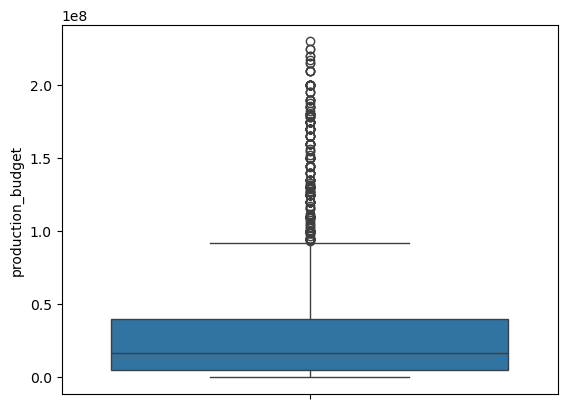

In [525]:
max_production_budget = df_movies["production_budget"].quantile(0.995)
max_production_budget
df1_movies[df1_movies["production_budget"] > max_production_budget]
df2_movies = df1_movies[df1_movies["production_budget"] < max_production_budget]
sns.boxplot(df2_movies["production_budget"])
plt.show()

In [ ]:
max_production_budget = df_movies["production_budget"].quantile(0.995)
max_production_budget
df1_movies[df1_movies["production_budget"] > max_production_budget]
df2_movies = df1_movies[df1_movies["production_budget"] < max_production_budget]
sns.boxplot(df2_movies["production_budget"])
plt.show()

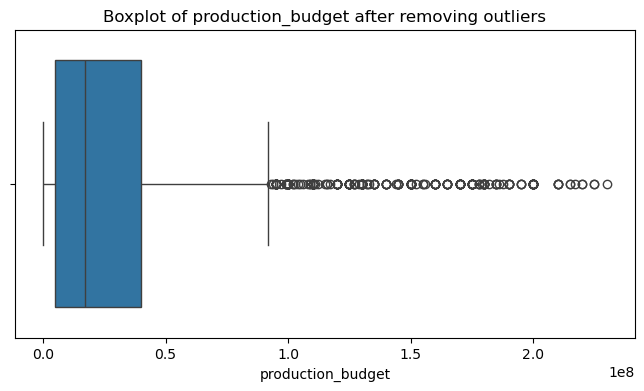

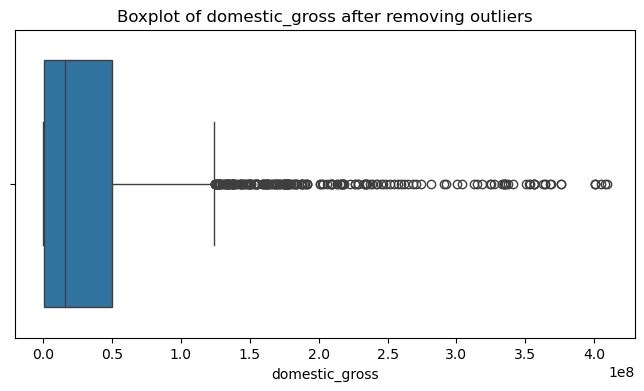

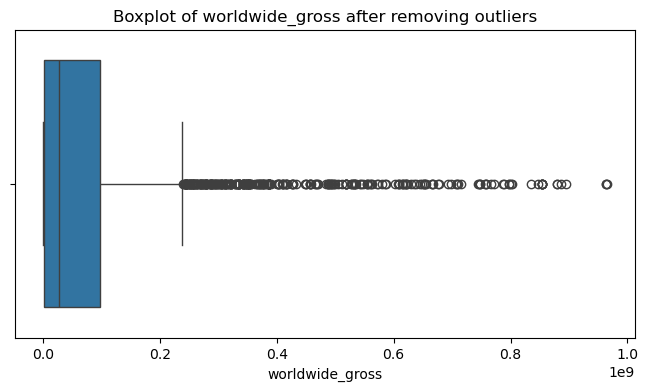

Shape of the cleaned DataFrame: (2818, 11)


In [526]:
#removing outliers all at once

# Columns to process for outlier removal
columns_to_process = ["production_budget", "domestic_gross", "worldwide_gross"]

# Create a copy of the original DataFrame to avoid modifying it directly
df3_movies = df_movies.copy()

# Loop through the specified columns and remove outliers
for column in columns_to_process:
    max_threshold = df3_movies[column].quantile(0.995)  # Calculate the 99.5th percentile
    df3_movies = df3_movies[df3_movies[column] < max_threshold]  # Remove outliers above the threshold
    
    # Optional: Plot boxplot to visualize the cleaned column
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df3_movies[column])
    plt.title(f"Boxplot of {column} after removing outliers")
    plt.show()

# Display the resulting DataFrame
print(f"Shape of the cleaned DataFrame: {df3_movies.shape}")


In [527]:
df3_movies.shape

(2818, 11)

In [548]:
# Calculate Foreign Gross
df3_movies['foreign_gross'] = df3_movies['worldwide_gross'] - df3_movies['domestic_gross']

# Calculate Profits
df3_movies['profits'] = df3_movies['worldwide_gross'] - df3_movies['production_budget']

# Display the first few rows to verify the new columns
print(df3_movies[['worldwide_gross', 'domestic_gross', 'foreign_gross', 'production_budget', 'profits']].head())

# Optionally save the updated dataset
output_csv_path = r"C:\Users\Fluxtech\Desktop\Final_dataset\df3_movies_with.csv"
df3_movies.to_csv(output_csv_path, index=False)
print(f"The updated dataset has been saved at {output_csv_path}.")


   worldwide_gross  domestic_gross  foreign_gross  production_budget  \
0          73706.0               0        73706.0           45000000   
2        9313302.0          720828      8592474.0           25000000   
3      187861183.0        58236838    129624345.0           91000000   
4       62108587.0        26017685     36090902.0           28000000   
6       21544732.0        13109815      8434917.0           45000000   

      profits  
0 -44926294.0  
2 -15686698.0  
3  96861183.0  
4  34108587.0  
6 -23455268.0  
The updated dataset has been saved at C:\Users\Fluxtech\Desktop\Final_dataset\df3_movies_with.csv.


In [528]:
# Define the output path for the cleaned dataset
output_csv_path = r"C:\Users\Fluxtech\Desktop\Final_dataset\df3_movies.csv"

# Save the cleaned DataFrame to the specified path
df3_movies.to_csv(output_csv_path, index=False)

print(f"The cleaned dataset has been successfully saved at {output_csv_path}.")


The cleaned dataset has been successfully saved at C:\Users\Fluxtech\Desktop\Final_dataset\df3_movies.csv.


# 1. Univariate Analysis

### Bar Charts

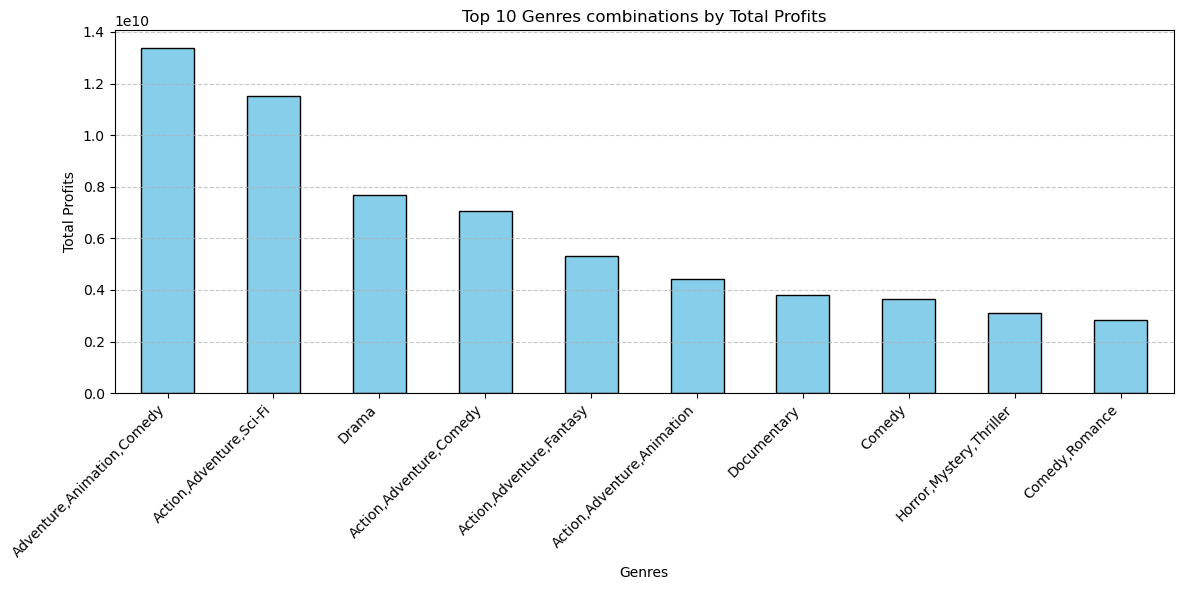

In [573]:


# Group by 'genres' and calculate the total profits
genre_profits = df3_movies.groupby('genres')['profits'].sum().sort_values(ascending=False)

# Select the top 10 genres by profits
top_10_genres = genre_profits.head(10)

# Plot a bar graph
plt.figure(figsize=(12, 6))
top_10_genres.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Genres combinations by Total Profits')
plt.xlabel('Genres')
plt.ylabel('Total Profits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


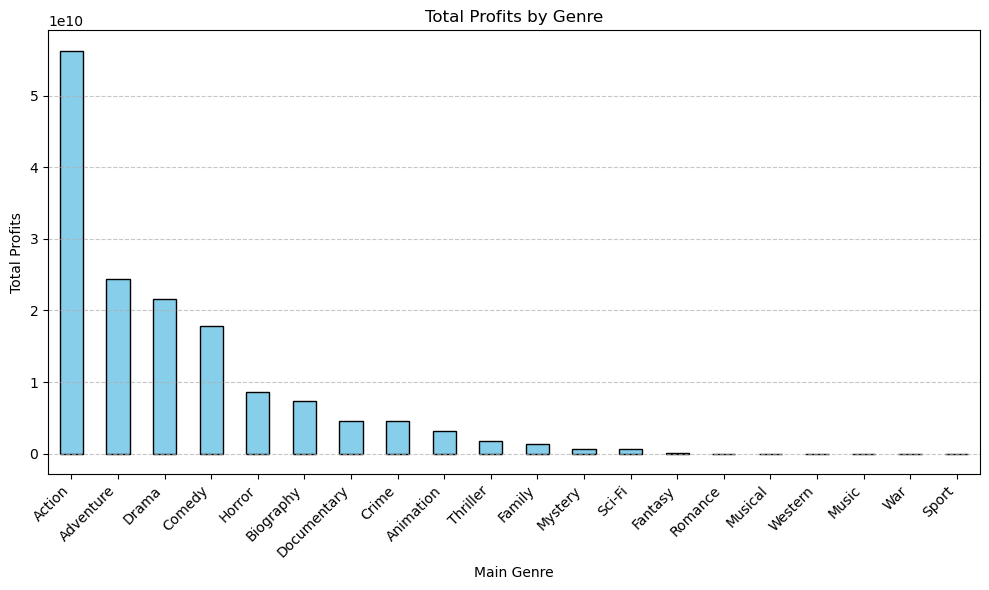

In [571]:
import matplotlib.pyplot as plt

# Group by main_genre and calculate the total profits
genre_profits = df3_movies.groupby('main_genre')['profits'].sum().sort_values(ascending=False)

# Plot a bar graph
plt.figure(figsize=(10, 6))
genre_profits.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Profits by Genre')
plt.xlabel('Main Genre')
plt.ylabel('Total Profits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Histograms 

for all numericals

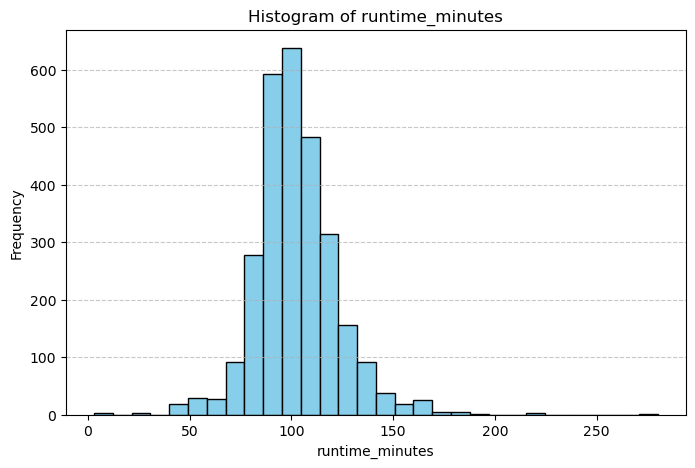

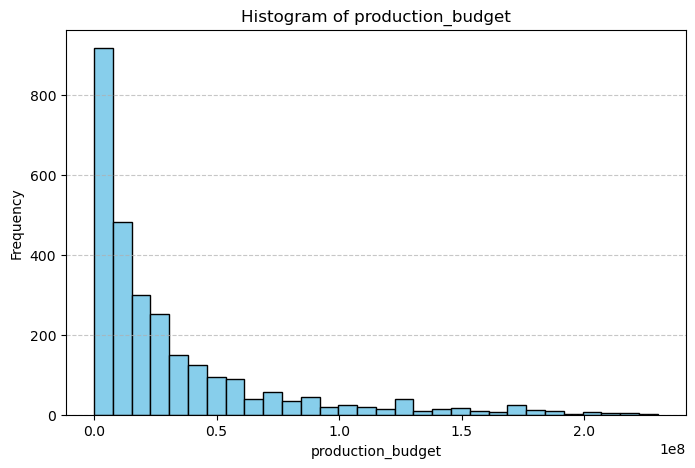

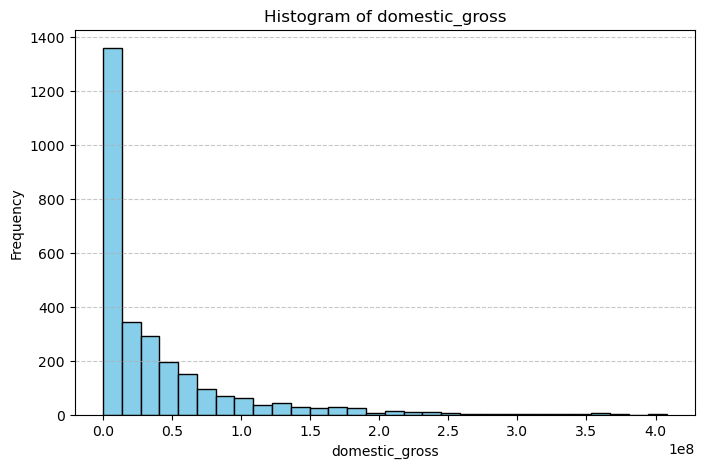

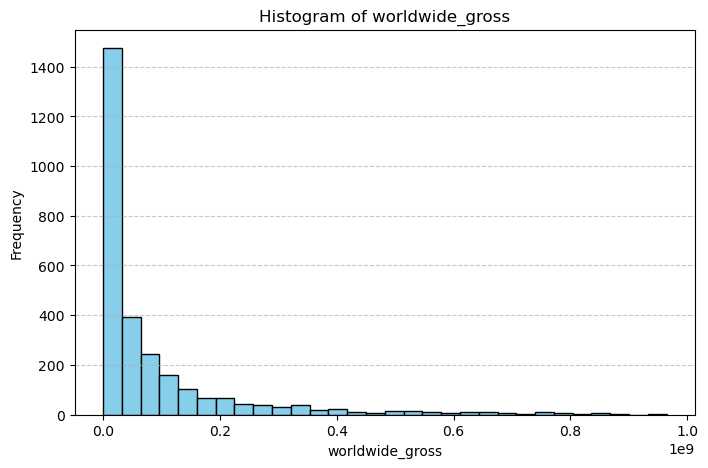

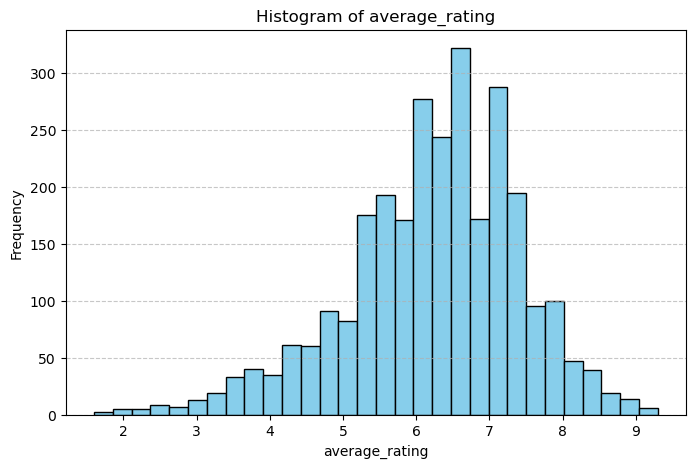

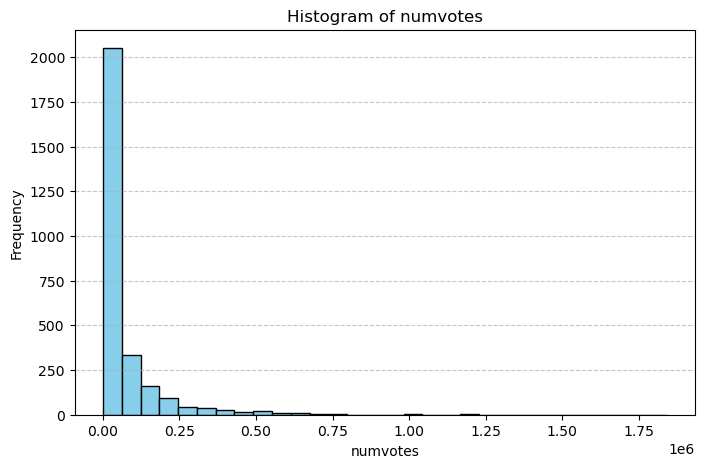

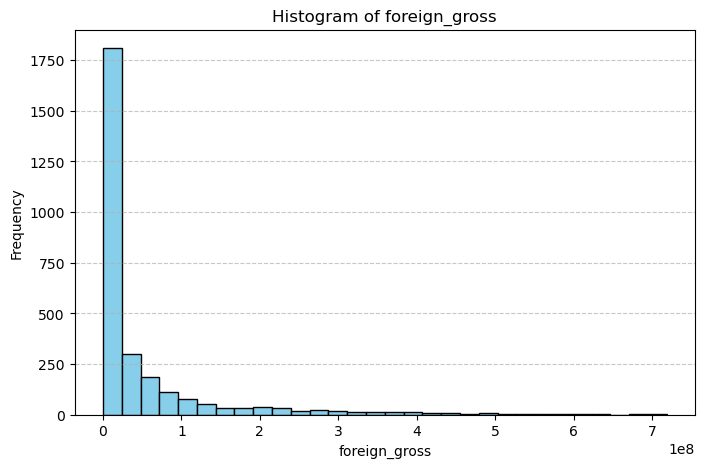

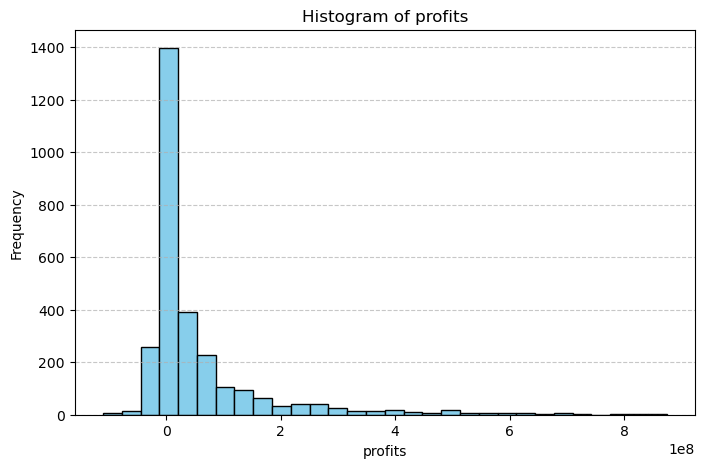

In [572]:


# List of numerical columns to create histograms for
numerical_columns = [
    'runtime_minutes', 
    'production_budget', 
    'domestic_gross', 
    'worldwide_gross', 
    'average_rating', 
    'numvotes',
    'foreign_gross',   # Add foreign_gross
    'profits'          # Add profits
]

# Create histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.hist(df3_movies[column], bins=30, color='skyblue', edgecolor='black')  # Create histogram
    plt.title(f'Histogram of {column}')  # Add title
    plt.xlabel(column)  # Label x-axis
    plt.ylabel('Frequency')  # Label y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
    plt.show()  # Display the plot



### Calculating Central Tendenancies

In [554]:
df3_movies.describe()

runtime_minutes  production_budget  domestic_gross  worldwide_gross  \
count      2818.000000       2.818000e+03    2.818000e+03     2.818000e+03   
mean        102.593271       3.114261e+07    3.709575e+07     8.536890e+07   
std          20.067247       4.046292e+07    5.636682e+07     1.446215e+08   
min           3.000000       1.400000e+03    0.000000e+00     0.000000e+00   
25%          90.000000       4.925000e+06    4.512898e+05     2.000023e+06   
50%         102.000000       1.600000e+07    1.532513e+07     2.763859e+07   
75%         112.000000       4.000000e+07    4.837819e+07     9.665832e+07   
max         280.000000       2.300000e+08    4.080107e+08     9.644962e+08   

       average_rating      numvotes  foreign_gross       profits  
count     2818.000000  2.818000e+03   2.818000e+03  2.818000e+03  
mean         6.236373  6.118991e+04   4.827314e+07  5.422629e+07  
std          1.187242  1.238448e+05   9.439324e+07  1.168899e+08  
min          1.600000  5.000000e+00   0.000000e+00 -1.104502e+08  
25%          5.600000  1.410000e+02   6.353700e+04 -2.515701e+06  
50%          6.300000  7.462500e+03   8.773898e+06  8.495213e+06  
75%          7.100000  7.127600e+04   4.847645e+07  5.924081e+07  
max          9.300000  1.841066e+06   7.184433e+08  8.744962e+08

# 2. Bivariate Analysis

### Scatter Plots

<Figure size 2000x1500 with 0 Axes>

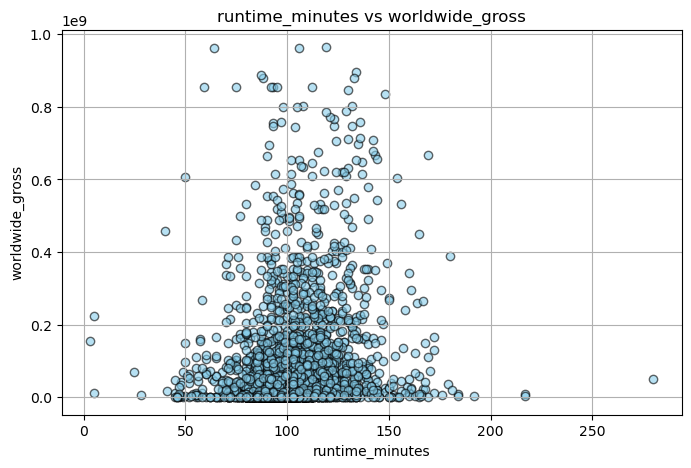

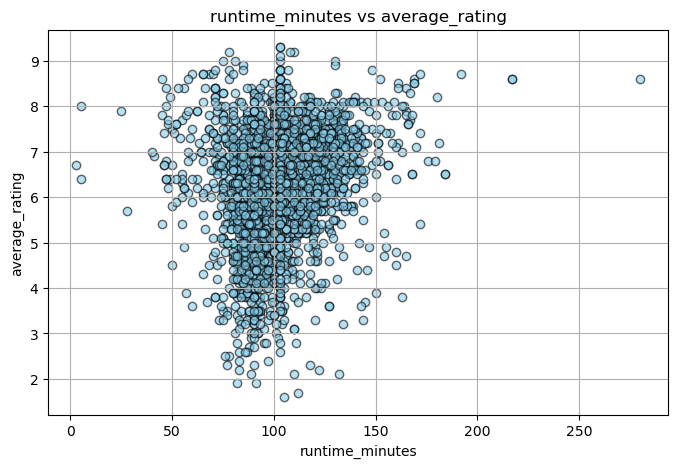

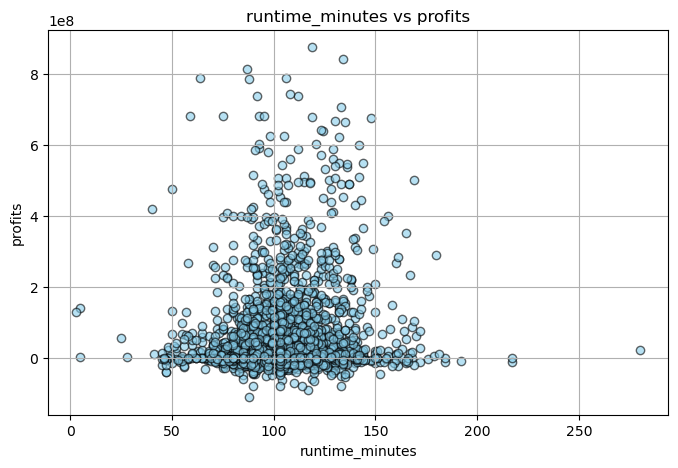

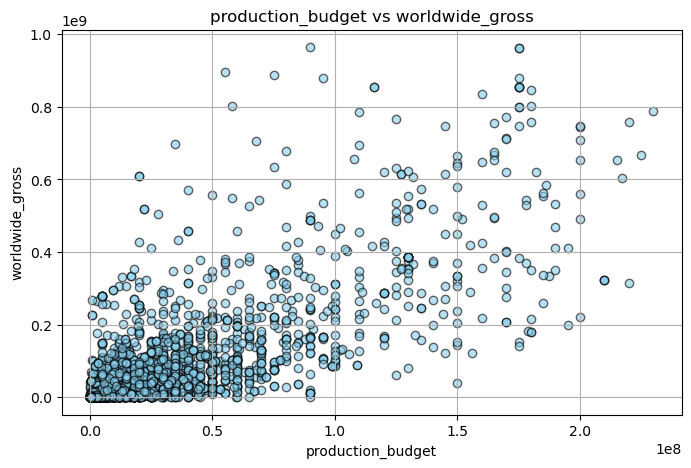

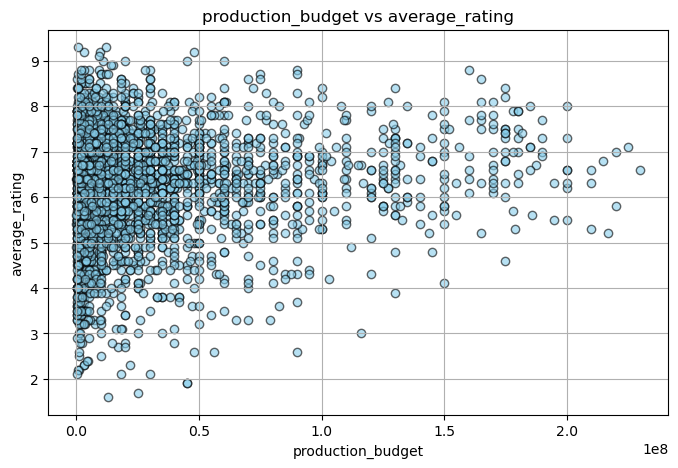

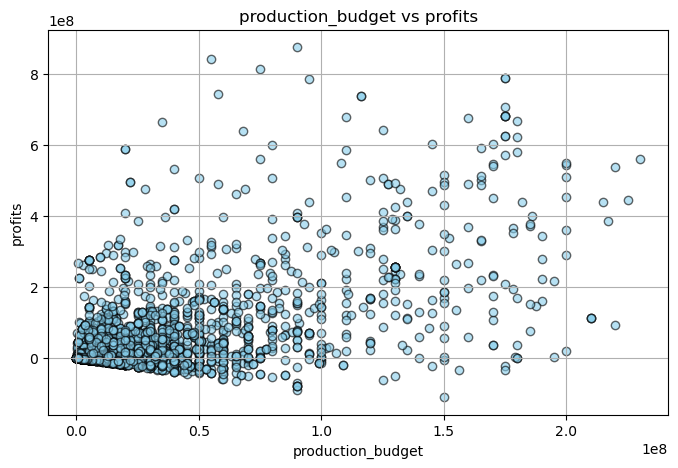

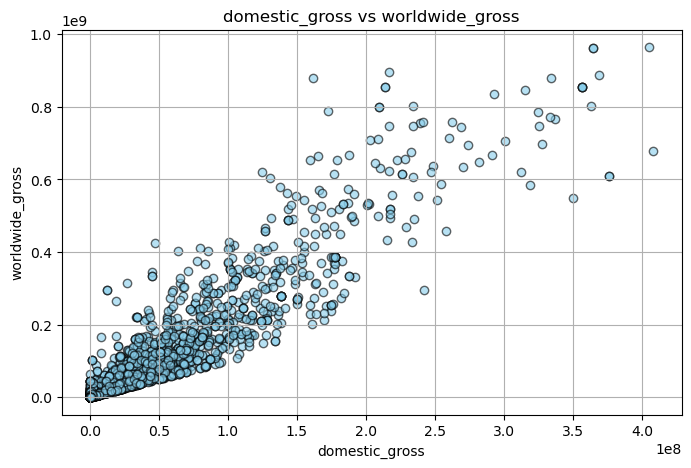

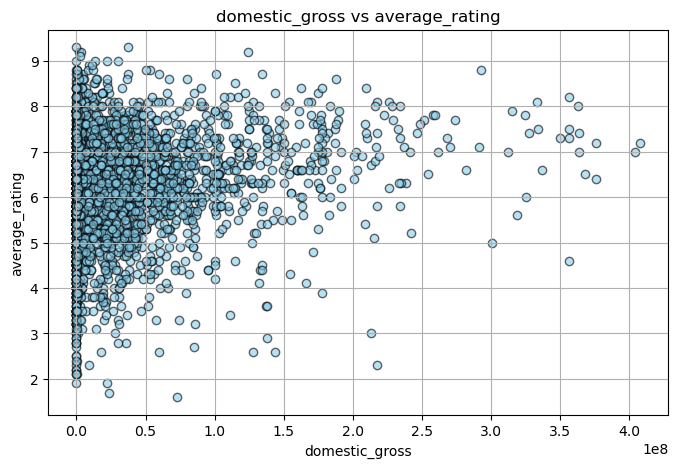

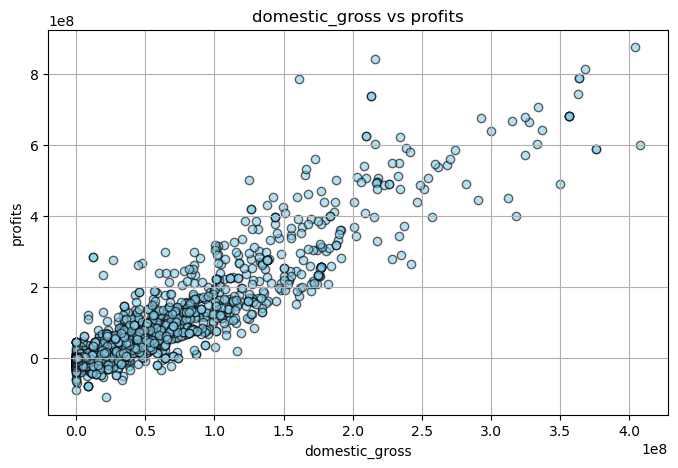

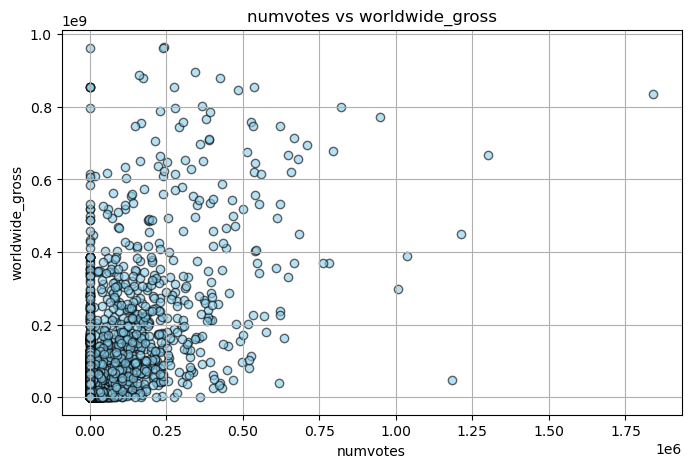

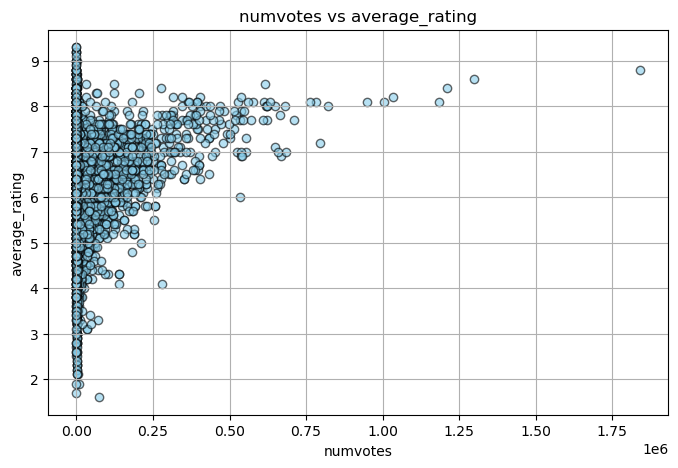

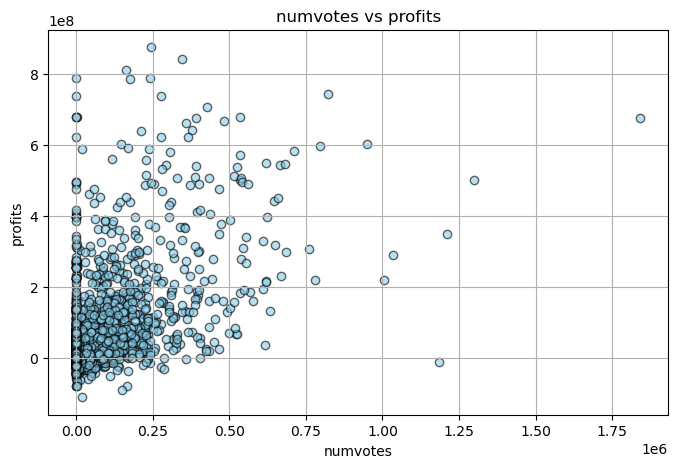

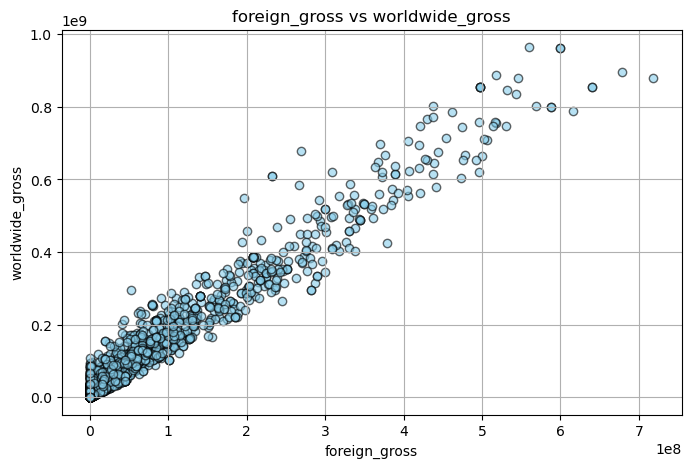

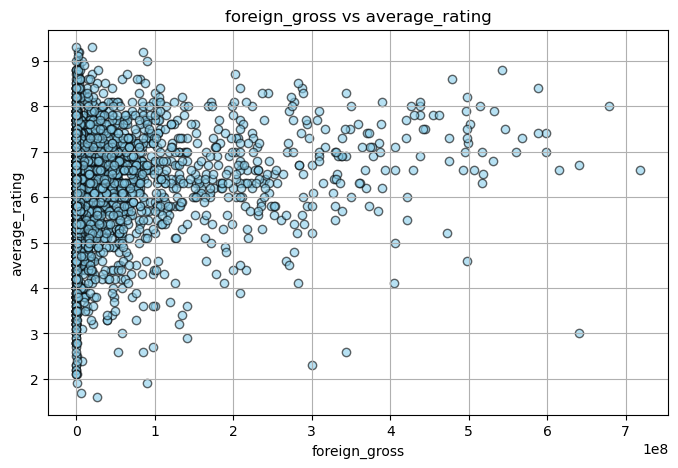

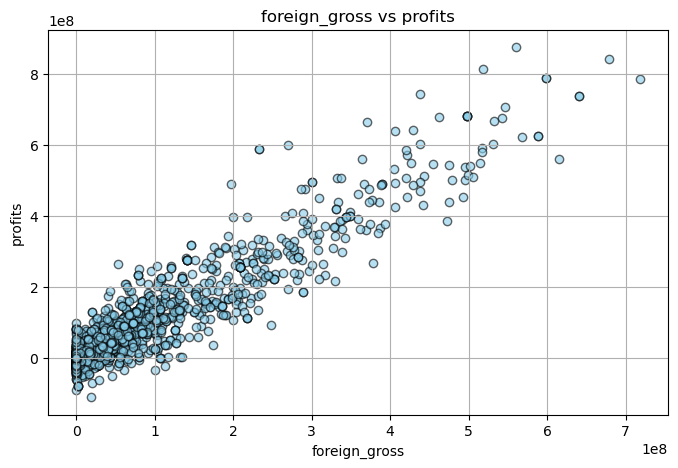

In [559]:

# Define the column to compare against
y_columns = ['worldwide_gross', 'average_rating', "profits"]  # Add average_rating as another y_column
x_columns = [
    'runtime_minutes', 
    'production_budget', 
    'domestic_gross', 
    'numvotes',
    'foreign_gross',
    
]

# Create scatterplots for each combination of x_columns and y_columns
plt.figure(figsize=(20, 15))  # Adjust the figure size

# Loop through x_columns and plot against each y_column
for i, x_column in enumerate(x_columns, start=1):
    for y_column in y_columns:
        plt.figure(figsize=(8, 5))  # Separate plots for better clarity
        plt.scatter(df3_movies[x_column], df3_movies[y_column], alpha=0.6, color='skyblue', edgecolor='black')
        plt.title(f'{x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.grid(True)
        plt.show();


### Correlation

Correlation Matrix:
                   runtime_minutes  production_budget  domestic_gross  \
runtime_minutes           1.000000           0.197398        0.156855   
production_budget         0.197398           1.000000        0.669124   
domestic_gross            0.156855           0.669124        1.000000   
numvotes                  0.327497           0.447650        0.543002   
foreign_gross             0.165779           0.764139        0.829605   
profits                   0.141181           0.593576        0.920535   
worldwide_gross           0.169338           0.759541        0.931230   
average_rating            0.193131           0.105363        0.165477   

                   numvotes  foreign_gross   profits  worldwide_gross  \
runtime_minutes    0.327497       0.165779  0.141181         0.169338   
production_budget  0.447650       0.764139  0.593576         0.759541   
domestic_gross     0.543002       0.829605  0.920535         0.931230   
numvotes           1.000000   

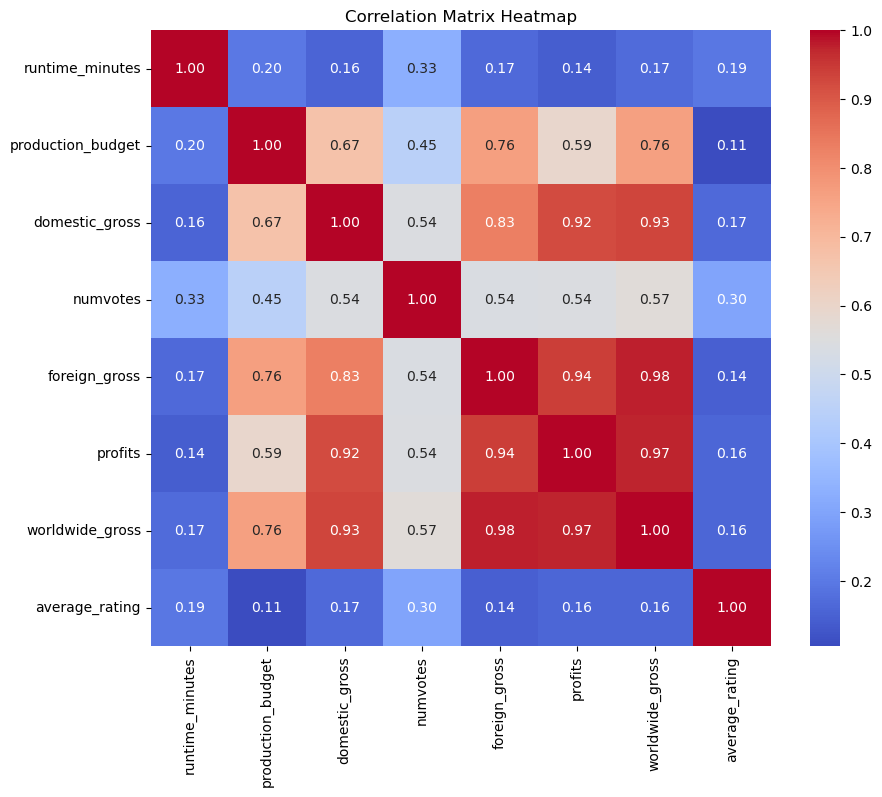

In [564]:
# List of numerical columns for correlation
nums = [
    'runtime_minutes', 
    'production_budget', 
    'domestic_gross', 
    'numvotes',
    'foreign_gross',
    'profits',  # Ensure column name is correct
    'worldwide_gross', 
    'average_rating'
]

# Calculate correlation matrix for the selected columns
correlation_matrix = df3_movies[nums].corr()

# Display the full correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()



In [566]:
df3_movies["main_genre"].unique()

array(['Action', 'Adventure', 'Comedy', 'Horror', 'Drama', 'Biography',
       'Crime', 'Documentary', 'Animation', 'Fantasy', 'Mystery',
       'Thriller', 'Musical', 'Romance', 'Family', 'Sci-Fi', 'Music',
       'Western', 'Sport', 'War'], dtype=object)

# Regression Modeling

In [574]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select features and target variable
features = ['runtime_minutes', 'production_budget', 'domestic_gross', 'numvotes', 'average_rating', 'main_genre']
target = 'profits'

# Ensure the dataset doesn't have missing values
df3_movies = df3_movies.dropna(subset=features + [target])

# Define X (features) and y (target)
X = df3_movies[features]
y = df3_movies[target]

# One-hot encode the categorical column ('main_genre')
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), ['main_genre'])],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1825061970213480.5
R-squared: 0.8694084353703265


## The following 4 assumptions were tested

1. Linearity
2. Indipendence of variables
3. Normality
4. Equal variance

### 1. Testing for Linearity

#### a. Scatter plots were used

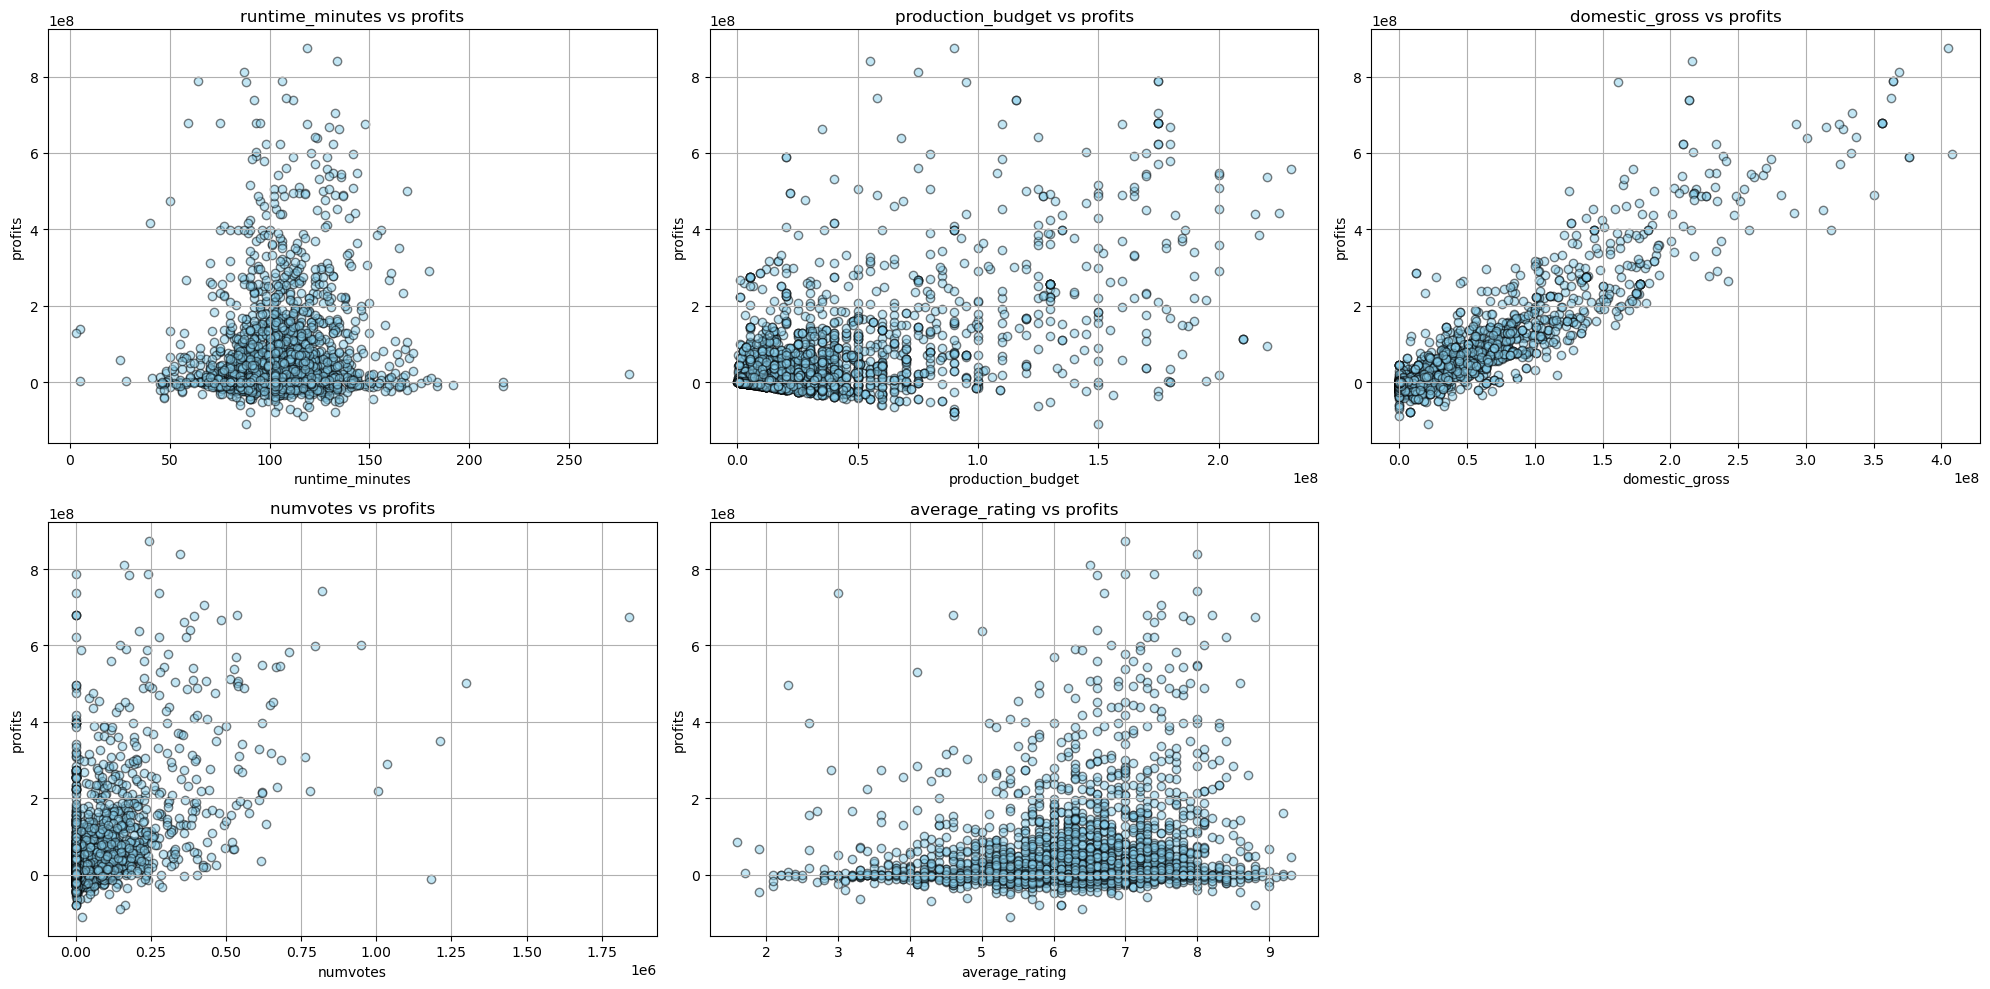

In [575]:
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['runtime_minutes', 'production_budget', 'domestic_gross', 'numvotes', 'average_rating']
target = 'profits'

# Create scatterplots for each feature against the target
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df3_movies[feature], df3_movies[target], alpha=0.5, color='skyblue', edgecolor='black')
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [576]:
# Define the features and target variable
features = ['runtime_minutes', 'production_budget', 'domestic_gross', 'numvotes', 'average_rating']
target = 'profits'

# Calculate correlations between each feature and the target
correlations = df3_movies[features + [target]].corr()[target].drop(target)

# Display the correlation coefficients
print("Correlation Coefficients with 'profits':")
print(correlations)

# Check if correlations meet a threshold (e.g., |correlation| > 0.3 for moderate linearity)
threshold = 0.3
significant_features = correlations[correlations.abs() > threshold]

print("\nFeatures with moderate or strong linear relationships with 'profits':")
print(significant_features)


Correlation Coefficients with 'profits':
runtime_minutes      0.141181
production_budget    0.593576
domestic_gross       0.920535
numvotes             0.544264
average_rating       0.160076
Name: profits, dtype: float64

Features with moderate or strong linear relationships with 'profits':
production_budget    0.593576
domestic_gross       0.920535
numvotes             0.544264
Name: profits, dtype: float64


#### 2. Testing for multicolinearity


In [577]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Standardize data before calculating VIF
X = df3_movies[['runtime_minutes', 'production_budget', 'domestic_gross', 'numvotes', 'average_rating']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif)


            Variable       VIF
0    runtime_minutes  1.144354
1  production_budget  1.865132
2     domestic_gross  2.105668
3           numvotes  1.645152
4     average_rating  1.112927


Low VIF (< 5): Suggests low multicollinearity. 

Which indicates that all our variables should be included in the model

### 3. Testing for Normality


Testing Normality for runtime_minutes:
  Shapiro-Wilk Test: Test Statistic=0.9527, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.0756, p-value=0.0000
  Jarque-Bera Test: Test Statistic=2677.0855, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=471.3847, p-value=0.0000


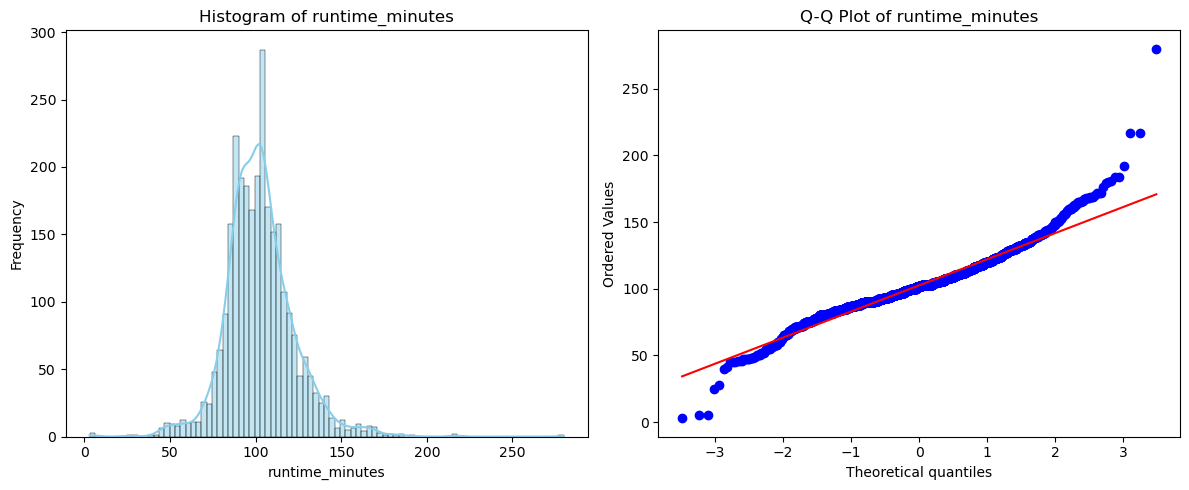


Testing Normality for production_budget:
  Shapiro-Wilk Test: Test Statistic=0.7268, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.2208, p-value=0.0000
  Jarque-Bera Test: Test Statistic=4827.4824, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=1216.9732, p-value=0.0000


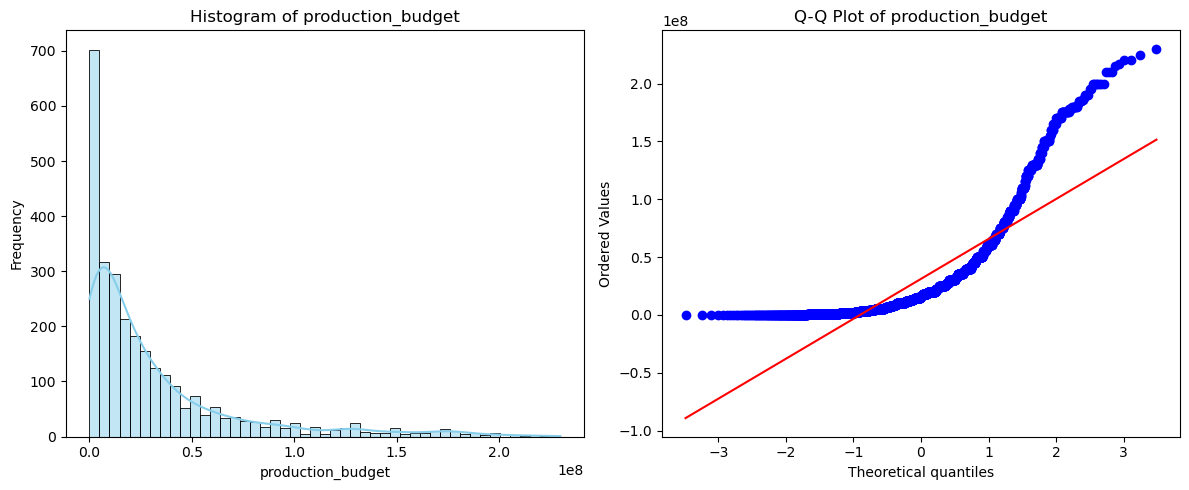


Testing Normality for domestic_gross:
  Shapiro-Wilk Test: Test Statistic=0.6799, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.2552, p-value=0.0000
  Jarque-Bera Test: Test Statistic=13214.0587, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=1623.1129, p-value=0.0000


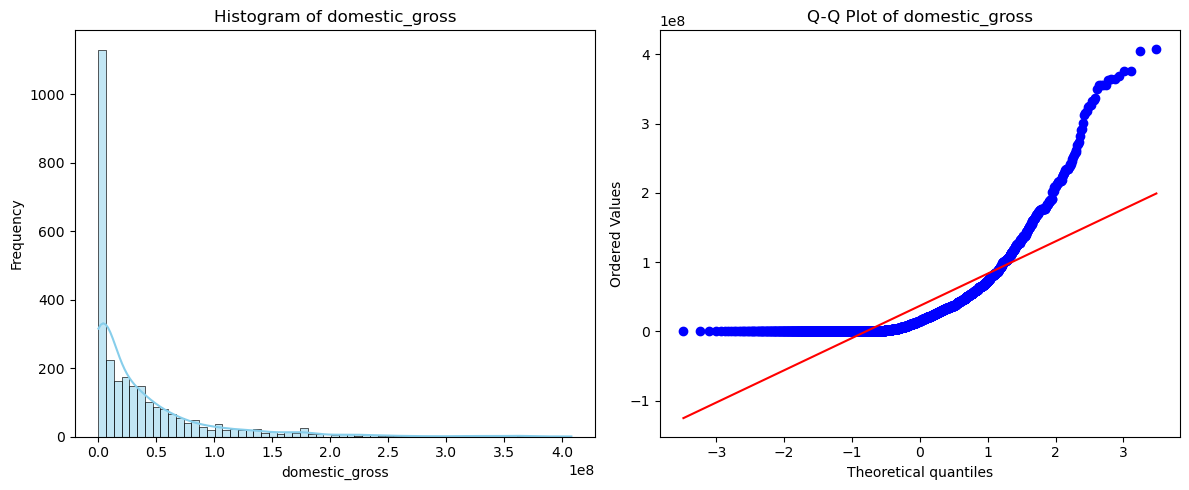


Testing Normality for numvotes:
  Shapiro-Wilk Test: Test Statistic=0.5367, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.3106, p-value=0.0000
  Jarque-Bera Test: Test Statistic=131921.7586, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=2645.2517, p-value=0.0000


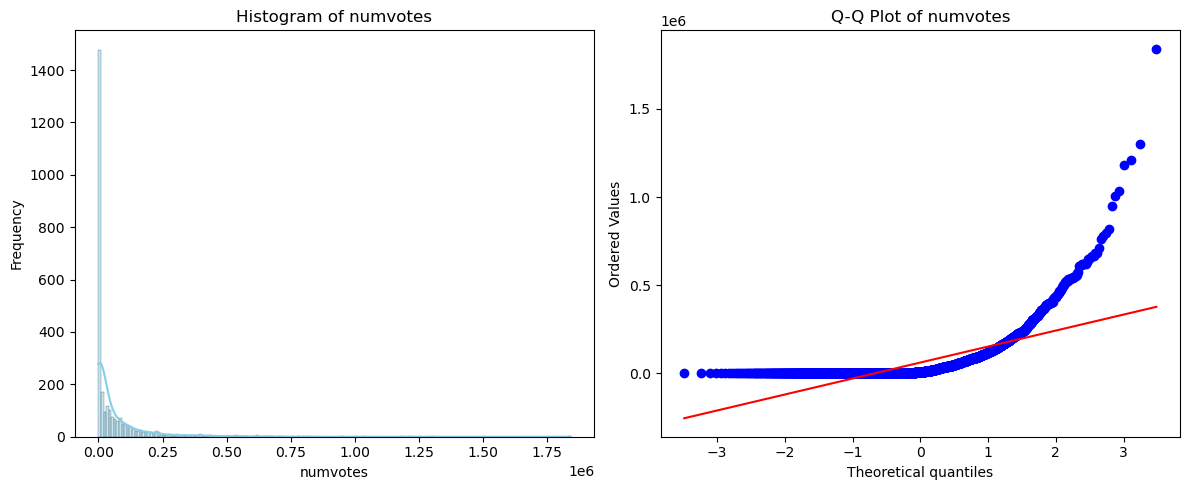


Testing Normality for foreign_gross:
  Shapiro-Wilk Test: Test Statistic=0.5638, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.3045, p-value=0.0000
  Jarque-Bera Test: Test Statistic=19588.3847, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=1876.6661, p-value=0.0000


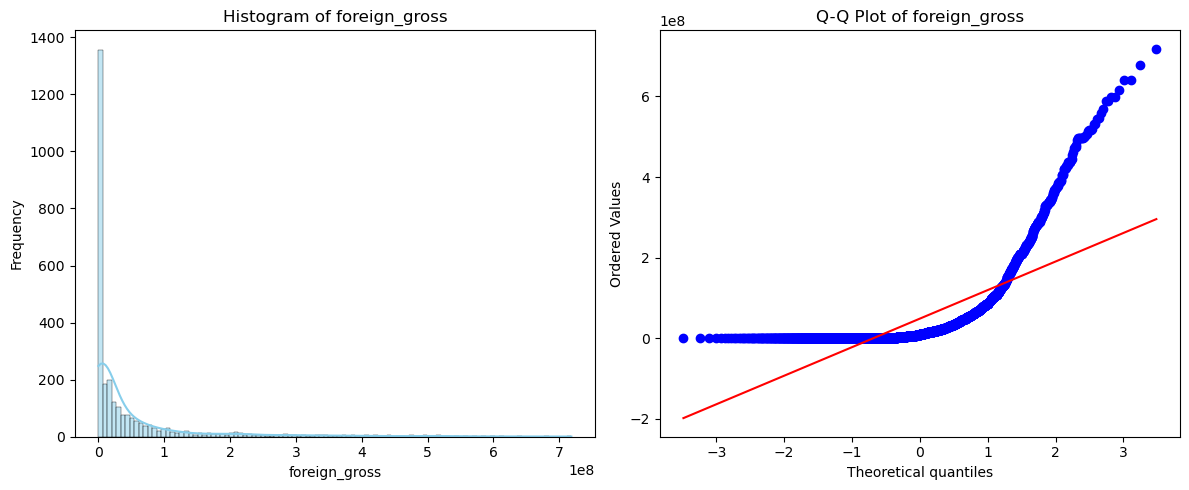


Testing Normality for profits:
  Shapiro-Wilk Test: Test Statistic=0.6153, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.2370, p-value=0.0000
  Jarque-Bera Test: Test Statistic=20560.5592, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=1881.0485, p-value=0.0000


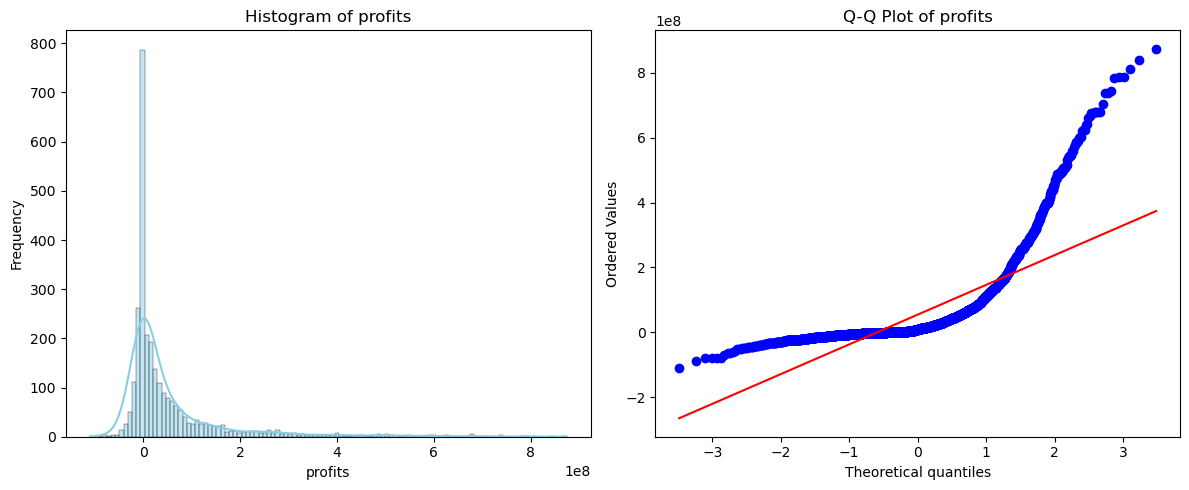


Testing Normality for worldwide_gross:
  Shapiro-Wilk Test: Test Statistic=0.6217, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.2775, p-value=0.0000
  Jarque-Bera Test: Test Statistic=14496.5580, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=1720.0157, p-value=0.0000


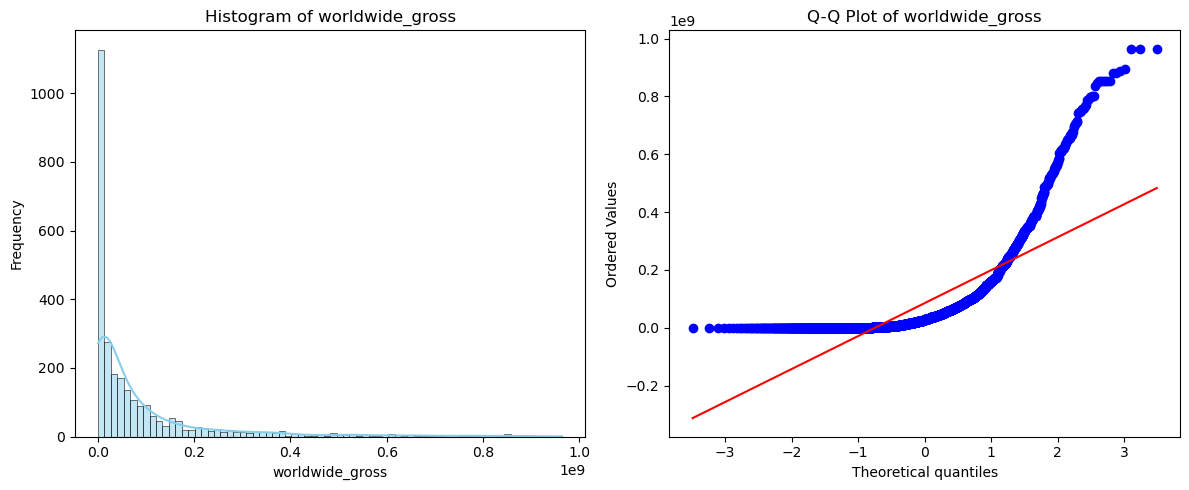


Testing Normality for average_rating:
  Shapiro-Wilk Test: Test Statistic=0.9788, p-value=0.0000
  Kolmogorov-Smirnov Test: Test Statistic=0.0742, p-value=0.0000
  Jarque-Bera Test: Test Statistic=208.0955, p-value=0.0000
  D'Agostino and Pearson's Test: Test Statistic=170.0226, p-value=0.0000


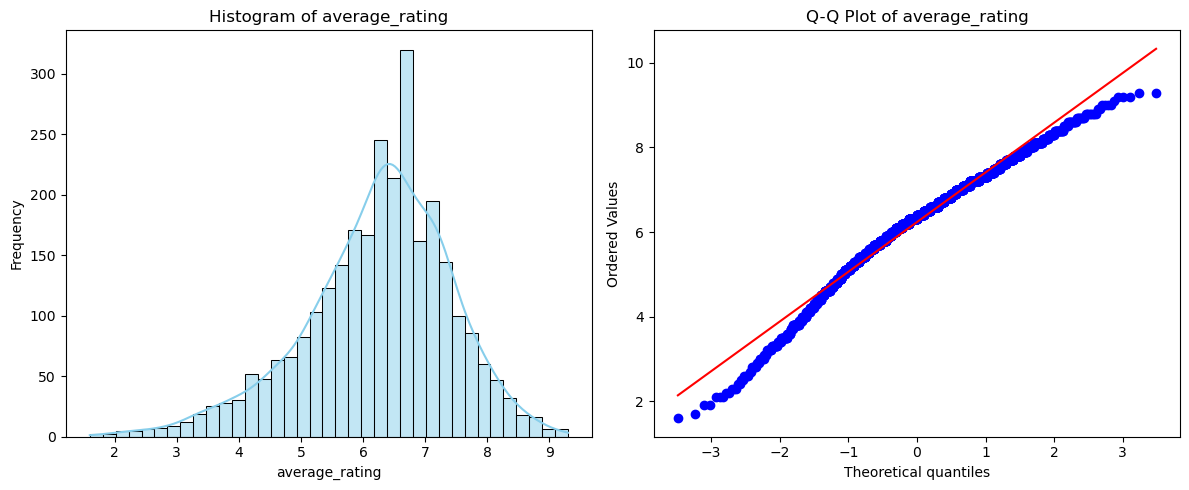

In [580]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, jarque_bera, normaltest

# List of numerical variables to test for normality
variables = [
    'runtime_minutes', 
    'production_budget', 
    'domestic_gross', 
    'numvotes',
    'foreign_gross',
    'profits',
    'worldwide_gross', 
    'average_rating'
]

# Iterate over variables to test normality
for var in variables:
    print(f"\nTesting Normality for {var}:")
    
    # Extract the data and drop NaN values
    data = df3_movies[var].dropna()
    
    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(data)
    print(f"  Shapiro-Wilk Test: Test Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    
    # Kolmogorov-Smirnov Test
    kstest_stat, kstest_p = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"  Kolmogorov-Smirnov Test: Test Statistic={kstest_stat:.4f}, p-value={kstest_p:.4f}")
    
    # Jarque-Bera Test
    jb_stat, jb_p = jarque_bera(data)
    print(f"  Jarque-Bera Test: Test Statistic={jb_stat:.4f}, p-value={jb_p:.4f}")
    
    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p = normaltest(data)
    print(f"  D'Agostino and Pearson's Test: Test Statistic={dagostino_stat:.4f}, p-value={dagostino_p:.4f}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    
    plt.tight_layout()
    plt.show()


In [596]:
import statsmodels.api as sm
import pandas as pd

# Define features and target variable
features = [
    'runtime_minutes', 
    'production_budget', 
    'domestic_gross', 
    'numvotes',
    'foreign_gross', 
    'average_rating', 
    'main_genre'
]
target = 'profits'

# One-hot encode the categorical variable ('main_genre')
df3_movies_encoded = pd.get_dummies(df3_movies, columns=['main_genre'], drop_first=False)

# Prepare X and y
X = df3_movies_encoded[[
    'runtime_minutes', 
    'production_budget', 
    'domestic_gross', 
    'numvotes', 
    'foreign_gross', 
    'average_rating'
] + [col for col in df3_movies_encoded.columns if col.startswith('main_genre_')]]  # Include all dummy variables
X = sm.add_constant(X)  # Add intercept
y = df3_movies_encoded[target]

# Build the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                profits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.082e+32
Date:                Sun, 19 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:38:39   Log-Likelihood:                 41351.
No. Observations:                2818   AIC:                        -8.269e+04
Df Residuals:                    2811   BIC:                        -8.265e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.005e-08    1.4e-0

In [615]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Ensure df3_movies contains the following columns:
# ['production_budget', 'main_genre', 'runtime_minutes', 'release_date',
#  'domestic_gross', 'worldwide_gross', 'foreign_gross', 'average_rating', 'numvotes', 'profits']

# Define features and target
numerical_features = [
    'production_budget', 
    'runtime_minutes', 
    'domestic_gross', 
    'worldwide_gross', 
    'foreign_gross', 
    'average_rating', 
    'numvotes'
]
categorical_features = ['main_genre']
date_feature = ['release_date']
target = 'profits'

# Process the release_date feature
# Extract useful components like year or month (adjust based on your dataset)
df3_movies['release_year'] = pd.to_datetime(df3_movies['release_date']).dt.year
df3_movies['release_month'] = pd.to_datetime(df3_movies['release_date']).dt.month
numerical_features.extend(['release_year', 'release_month'])

# Log-transform the target variable
df3_movies['log_profits'] = np.log1p(df3_movies['profits'])

# Log-transform skewed numerical features
for col in numerical_features:
    df3_movies[col] = np.log1p(df3_movies[col])

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encode categorical variables
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Prepare data
X = df3_movies[numerical_features + categorical_features]
y = df3_movies['log_profits']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Display coefficients
# Retrieve feature names from the pipeline
numerical_feature_names = numerical_features
categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=categorical_features)
all_feature_names = numerical_feature_names + list(categorical_feature_names)

coefficients = pipeline.named_steps['regressor'].coef_

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nCoefficients:")
print(coef_df)


Mean Squared Error (MSE): 0.2311
R-squared (R²): 0.9221

Coefficients:
             Feature  Coefficient
3    worldwide_gross     2.348534
7       release_year     0.064387
8      release_month     0.048535
4      foreign_gross     0.010196
1    runtime_minutes     0.007386
5     average_rating     0.006911
6           numvotes     0.003267
2     domestic_gross    -0.004052
0  production_budget    -0.838020


## Testing for residuals normality

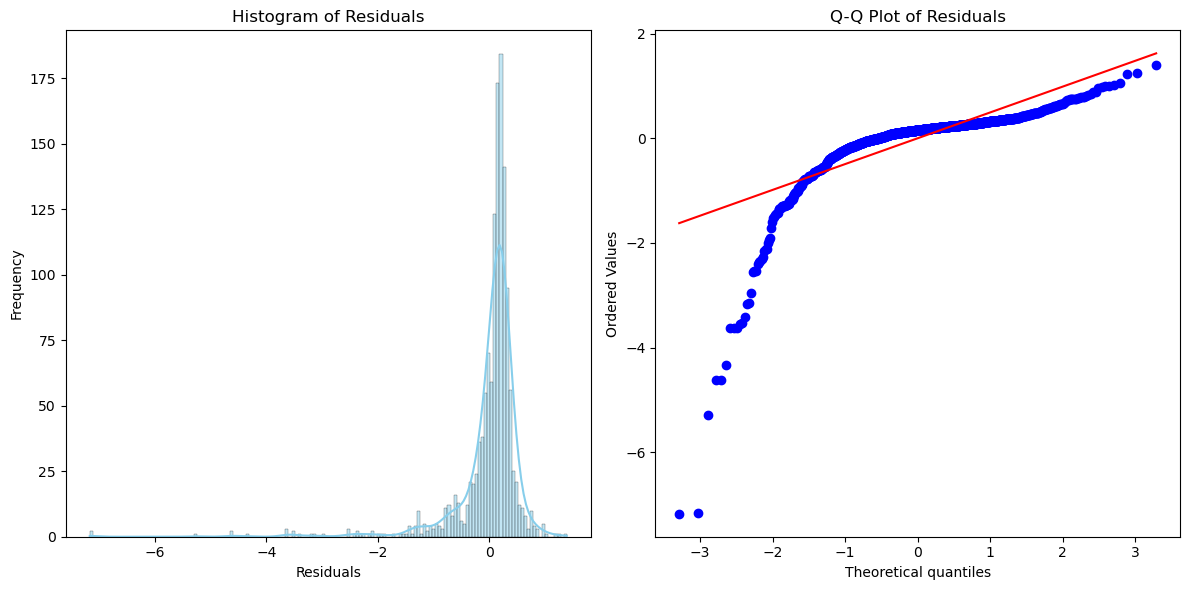

Shapiro-Wilk Test: Test Statistic=0.5898, p-value=0.0000
Jarque-Bera Test: Test Statistic=79068.4978, p-value=0.0000
Kolmogorov-Smirnov Test: Test Statistic=0.2268, p-value=0.0000


In [616]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract residuals
y_train_pred = pipeline.predict(X_train)  # Predicted values
residuals = y_train - y_train_pred  # Residuals (actual - predicted)

# Step 2: Visualize residuals
plt.figure(figsize=(12, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Step 3: Statistical tests for normality
# Shapiro-Wilk Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Test Statistic={shapiro_test_stat:.4f}, p-value={shapiro_p_value:.4f}")

# Jarque-Bera Test
jb_test_stat, jb_p_value = stats.jarque_bera(residuals)
print(f"Jarque-Bera Test: Test Statistic={jb_test_stat:.4f}, p-value={jb_p_value:.4f}")

# Kolmogorov-Smirnov Test
ks_test_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f"Kolmogorov-Smirnov Test: Test Statistic={ks_test_stat:.4f}, p-value={ks_p_value:.4f}")


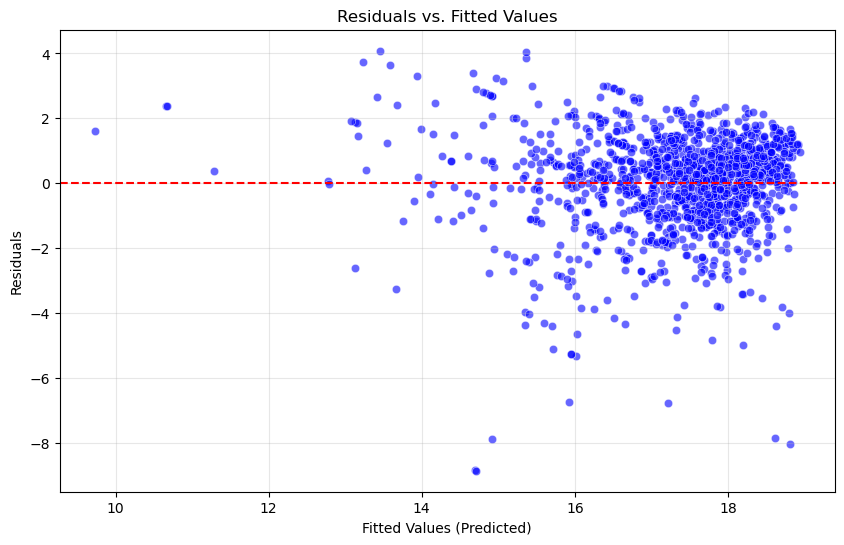

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract residuals and fitted values
y_train_pred = pipeline.predict(X_train)
residuals = y_train - y_train_pred

# Create Residuals vs. Fitted Values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()


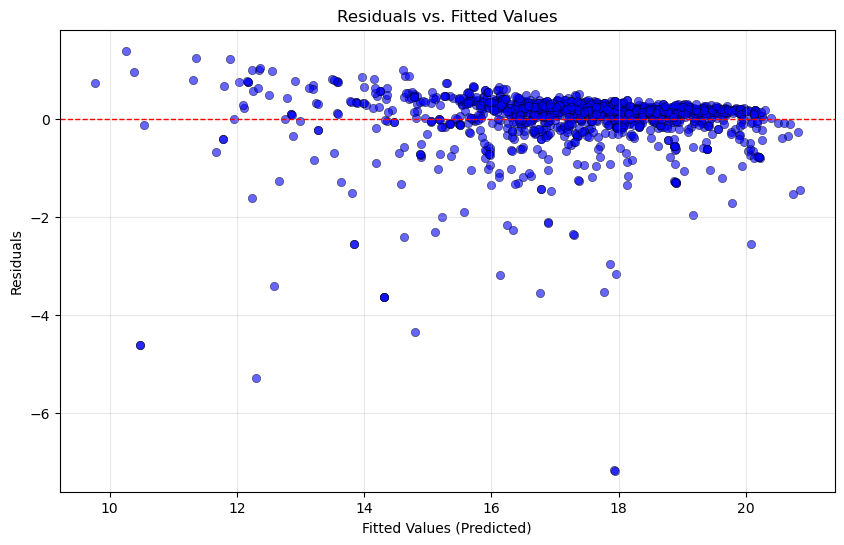

In [618]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract residuals and fitted values
y_train_pred = pipeline.predict(X_train)
residuals = y_train - y_train_pred

# Create Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at zero
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()


### Observations from the Plot:

Spread of Residuals:

The residuals' variance appears to increase slightly as the fitted values increase. This fan-shaped pattern is a sign of heteroscedasticity.